# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : **Glaucoma**


K01 - K02 - Kelompok 05

Anggota Kelompok :
1. An-Dafa Anza Avansyah - 13524038
2. Raymond Jonathan D.P.J. - 13524059

## *"What do a zoo owner and a Python data analyst have in common? They both import pandas."*

## Inisialisasi Dependencies dan Load Data

### Inisialisasi Dependencies

Pada dasarnya penulis menggunakan semua library yang telah disediakan yaitu, **pandas** untuk pembacaan data, **numpy** untuk perhitungan matematis, **matplotlib** untuk pembuatan plot/diagram data, lalu **gdown** untuk melakuakn load data dari sumber online. Akan tetapi terdapat datu template tambahan yaitu **re**. Library **re** atau yang dikenal sebagai *regular expression* penulis gunakan untuk melakukan *feature engineering* pada dataset **Glaucoma**.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import re
from scipy.stats import norm, probplot, gaussian_kde

### Load Data

 Penulis menumakan bahwa pada data set tersebut terdapat dua fitur/kolom/atribut yang perlu dilakukan *feature engineering* karena pada dasarnya fitur tersebut berisi beberapa angka numerik yang merujuk ke fitur/atribut baru lainnya, misalnya pada fitur **Visual Field Test Result** yang memuat dua fitur/atribut numerik yang berbeda yakni **Sensivity** dan **Specifity**, fitur/atribut lainnya yaitu **Optical Coherence Tomography (OCT) Results** yang memuat tiga fitur/atribut numerik yang berbeda yakni **RNFL_Thickness**, **GCC_Thickness**, **Retinal_Volume**, dan **Macular_Thickness**. Pada akhirnya penulis membuang (*drop*) kedua fitur bertipe object tersebut dan menambahkan enam fitur bertipe numerik seperti yang penulis jelaskan sebelumnya. Selain itu penulis juga melakukan perubahan tipe data untuk atribut **Patient ID** yang awalnya bertipe **int64** menjadi **string** dengan pertimbangan bahwa ID pasien adalah atribut unik yang setiap datanya pasti berbeda dan tidak dapat dicari statistik deskriptif numertiknya. Perubahan ini ditampilkan dengan *data_info()* sebelum dan sesudah dilakukan *feature engineering*

In [42]:
url = "https://drive.google.com/uc?id=1rp-u0-DCMUH-61znngNpPeAZwdvGjKb7"

output = "glaucoma.csv"
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)
data.info()

# Uhh I see, need to do data preparation to get numeric data for the visual field test result and OCT results

def parse_oct(x):
    if pd.isna(x):
        return [np.nan] * 4
    pattern = r"RNFL Thickness:\s*([\d.]+).*?GCC Thickness:\s*([\d.]+).*?Retinal Volume:\s*([\d.]+).*?Macular Thickness:\s*([\d.]+)"
    match = re.search(pattern, str(x))
    if match:
        return [float(m) for m in match.groups()]
    return [np.nan] * 4

data[["RNFL_Thickness", "GCC_Thickness", "Retinal_Volume", "Macular_Thickness"]] = \
data["Optical Coherence Tomography (OCT) Results"].apply(parse_oct).tolist()

def parse_vf(x):
    if pd.isna(x):
        return [np.nan] * 2
    pattern = r"Sensitivity:\s*([\d.]+).*?Specificity:\s*([\d.]+)"
    match = re.search(pattern, str(x))
    if match:
        return [float(m) for m in match.groups()]
    return [np.nan] * 2

data[["Sensitivity", "Specificity"]] = \
data["Visual Field Test Results"].apply(parse_vf).tolist()

data = data.drop(columns=["Optical Coherence Tomography (OCT) Results","Visual Field Test Results"])
data["Patient ID"] = data["Patient ID"].astype("string")

data.info()


Downloading...
From: https://drive.google.com/uc?id=1rp-u0-DCMUH-61znngNpPeAZwdvGjKb7
To: c:\Users\Yoga\OneDrive\Dokumen\[BELAJAR DATA]\SESI_BELAJAR\glaucoma.csv
100%|██████████| 3.38M/3.38M [00:04<00:00, 764kB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

# Soal General

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data.
- Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.
- Data yang bersifat kategorikal dapat dicari unique values, dan proporsi nya.

### Implementasi Menggunakan Fungsi Buatan Sendiri

#### Data Numerik

In [43]:
# UTILS

def bubble_sort_optimized(data): 
    # Aku suka bubble sort optimized :D, walaupun masih kalah cepat dibanding quicksort dan mergesort akan tetapi lebih mudah implementasinya dan tidak selambat itu :3 *probably
    n = len(data)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if data[j] > data[j + 1]:
                data[j], data[j + 1] = data[j + 1], data[j]
                swapped = True
        if not swapped:
            break
    # idk if I can use sort function too, but doing a optimized bubble sort is quiet fun for me, * so it quiete slowwww :((((
        
def merge_sort(data):
    if len(data) <= 1:
        return data
    
    mid = len(data) // 2
    left = merge_sort(data[:mid])
    right = merge_sort(data[mid:])

    return merge(left, right)

def merge(left, right):
    sorted_list = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_list.append(left[i])
            i += 1
        else:
            sorted_list.append(right[j])
            j += 1

    sorted_list.extend(left[i:])
    sorted_list.extend(right[j:])
    return sorted_list
    # I come with another solution

def floor_own(x):
    return int(x) if x >= 0 else int(x) - (x != int(x))

def ceil_own(x):
    return int(x) + (x != int(x)) if x >= 0 else int(x)

# STATISTIKA DESKRIPTIF

def modus_own(data):
    frekuensi = {}        
    for nilai in data:          
        if nilai in frekuensi:
            frekuensi[nilai] += 1
        else:
            frekuensi[nilai] = 1
    modus = None
    jumlah_terbanyak = 0
    for nilai, count in frekuensi.items():
        if count > jumlah_terbanyak:
            jumlah_terbanyak = count
            modus = nilai
    return modus

def mean_own(data):
    return sum(data) / len(data)

def median_own(data):
    valid_data = [x for x in data if x is not None and str(x).lower() != 'nan']
    valid_data = merge_sort(valid_data) 
    n = len(valid_data)
    if n == 0: return 0
    mid = n // 2
    if n % 2 == 0:
        return (valid_data[mid - 1] + valid_data[mid]) / 2
    return valid_data[mid]

def min_own(data):
    minimum = data[0]
    for nilai in data:
        if nilai < minimum:
            minimum = nilai
    return minimum

def max_own(data):
    maksimum = data[0]
    for nilai in data:
        if nilai > maksimum:
            maksimum = nilai
    return maksimum

def range_own(data):
    return max_own(data) - min_own(data) # idk if I can use this built-in-function, but whatever, (*Ah I see, I can use my own function after seeing what function I have to do next)

def varians_own(data):
    mean = mean_own(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

def standar_deviasi_own(data):
    return (varians_own(data)) ** 0.5

def quartil_generator(data, k):
    data = data[:]
    n = len(data)
    q = k * (n + 1) / 4
    idx = int(q)
    if q % 1 == 0:
        return data[idx - 1]
    frac = q - idx
    return data[idx - 1] + frac * (data[idx] - data[idx - 1])

def quartil_1(data): 
    return quartil_generator(data, 1)
def quartil_2(data): 
    return quartil_generator(data, 2)
def quartil_3(data): 
    return quartil_generator(data, 3)

def interquartil_range(data):
    return quartil_3(data) - quartil_1(data)

def skewness_own(data):
    mean = mean_own(data)
    std = standar_deviasi_own(data)
    return sum((x - mean) ** 3 for x in data) / (len(data) * std ** 3)

def kurtosis_own(data):
    mean = mean_own(data)
    std = standar_deviasi_own(data)
    return sum((x - mean) ** 4 for x in data) / (len(data) * std ** 4)

data_numerik = data.select_dtypes(include=["number"])
hasil_modus = {}
hasil_median = {}
hasil_mean = {}
hasil_min = {}
hasil_max = {}
hasil_range = {}
hasil_varians = {}
hasil_standar_deviasi = {}
hasil_quartil_1 = {}
hasil_quartil_2 = {}
hasil_quartil_3 = {}
hasil_iqr = {}
hasil_skewness = {}
hasil_kurtosis = {}


for kolom in data_numerik.columns:
    kolom_data = data_numerik[kolom].dropna().tolist()
    kolom_sorted = merge_sort(kolom_data)

    hasil_modus[kolom] = modus_own(kolom_sorted)
    hasil_median[kolom] = median_own(kolom_sorted)
    hasil_mean[kolom] = mean_own(kolom_sorted)
    hasil_min[kolom] = min_own(kolom_sorted) 
    hasil_max[kolom] = max_own(kolom_sorted) 
    hasil_range[kolom] = range_own(kolom_sorted) 
    hasil_varians[kolom] = varians_own(kolom_sorted) 
    hasil_standar_deviasi[kolom] = standar_deviasi_own(kolom_sorted) 
    hasil_quartil_1[kolom] = quartil_1(kolom_sorted) 
    hasil_quartil_2[kolom] = quartil_2(kolom_sorted) 
    hasil_quartil_3[kolom] = quartil_3(kolom_sorted) 
    hasil_iqr[kolom] = interquartil_range(kolom_sorted) 
    hasil_skewness[kolom] = skewness_own(kolom_sorted) 
    hasil_kurtosis[kolom] = kurtosis_own(kolom_sorted)

semua_hasil_numerik = {
    "Mean": hasil_mean,
    "Median": hasil_median,
    "Modus": hasil_modus,
    "Minimum": hasil_min,
    "Maksimum": hasil_max,
    "Range": hasil_range,
    "Varians": hasil_varians,
    "Standar Deviasi": hasil_standar_deviasi,
    "Q1": hasil_quartil_1,
    "Q2": hasil_quartil_2,
    "Q3": hasil_quartil_3,
    "IQR": hasil_iqr,
    "Skewness": hasil_skewness,
    "Kurtosis": hasil_kurtosis,
}

data_numerik_own = pd.DataFrame(semua_hasil_numerik).transpose()
display(data_numerik_own.style.background_gradient(cmap="viridis"))


,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,RNFL_Thickness,GCC_Thickness,Retinal_Volume,Macular_Thickness,Sensitivity,Specificity
Mean,53.872200,17.507527,0.548437,549.733974,87.433765,62.514676,6.000813,275.038068,0.750052,0.850237
Median,54.000000,17.485000,0.550000,549.335000,87.380000,62.520000,6.000000,275.130000,0.750000,0.850000
Modus,18.000000,21.650000,0.660000,547.890000,97.950000,69.660000,5.670000,261.300000,0.700000,0.990000
Minimum,18.000000,10.000000,0.300000,500.010000,75.010000,55.000000,5.500000,260.000000,0.500000,0.700000
Maksimum,90.000000,25.000000,0.800000,599.990000,100.000000,70.000000,6.500000,290.000000,1.000000,1.000000
Range,72.000000,15.000000,0.500000,99.980000,24.990000,15.000000,1.000000,30.000000,0.500000,0.300000
Varians,446.329267,18.973719,0.020828,835.284883,51.497537,18.781082,0.083949,75.935526,0.020730,0.007518
Standar Deviasi,21.126506,4.355883,0.144319,28.901296,7.176178,4.333715,0.289739,8.714099,0.143981,0.086705
Q1,36.000000,13.760000,0.420000,524.590000,81.280000,58.820000,5.750000,267.370000,0.630000,0.770000
Q2,54.000000,17.485000,0.550000,549.335000,87.380000,62.520000,6.000000,275.130000,0.750000,0.850000


#### Data Kategorikal

In [44]:
def unique_count(data):
    unique = []
    for item in data:
        if item not in unique and item is not None and item != "":
            unique.append(item)
    return len(unique)

def most_frequent(data):
    freq = {}
    for item in data:
        if item is None or item == "":
            continue
        if item not in freq:
            freq[item] = 1
        else:
            freq[item] += 1

    if not freq:
        return None
    
    max_count = 0
    most_item = None
    for key, value in freq.items():
        if value > max_count:
            max_count = value
            most_item = key
    
    return most_item

def most_frequent_count(data):
    freq = {}
    for item in data:
        if item is None or item == "":
            continue
        if item not in freq:
            freq[item] = 1
        else:
            freq[item] += 1

    if not freq:
        return 0
    
    max_count = 0
    for value in freq.values():
        if value > max_count:
            max_count = value
    return max_count

def proportion(data):
    freq = {}
    total = 0

    for item in data:
        if item is None or item == "":
            continue
        total += 1
        if item not in freq:
            freq[item] = 1
        else:
            freq[item] += 1

    if total == 0:
        return 0  

    max_count = 0
    for value in freq.values():
        if value > max_count:
            max_count = value

    return max_count / total


data_kategori = data.select_dtypes(include=["object","category","string"])

hasil_unique_count = {}
hasil_most_frequent = {}
hasil_most_frequent_count = {}
hasil_proportion = {}

for kolom in data_kategori.columns:
    kolom_data = data_kategori[kolom].dropna().tolist()
    
    hasil_unique_count[kolom] = unique_count(kolom_data)
    hasil_most_frequent[kolom] = most_frequent(kolom_data)
    hasil_most_frequent_count[kolom] = most_frequent_count(kolom_data)
    hasil_proportion[kolom] = proportion(kolom_data)

semua_hasil_kategori = {
    "Jumlah Unik": hasil_unique_count,
    "Frekuensi Paling Banyak": hasil_most_frequent,
    "Jumlah Frekuensi Paling Banyak": hasil_most_frequent_count,
    "Proporsi": hasil_proportion,
}
data_kategori_own = pd.DataFrame(semua_hasil_kategori).transpose()
display(data_kategori_own.style.background_gradient(cmap="Blues"))

,Patient ID,Gender,Visual Acuity Measurements,Family History,Medical History,Medication Usage,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
Jumlah Unik,10000,2,4,2,3,4079,2,2,512,2,6
Frekuensi Paling Banyak,62431,Male,LogMAR 0.0,No,Hypertension,Amoxicillin,Absent,Closed,"Vision loss, Halos around lights, Blurred vision",Glaucoma,Juvenile Glaucoma
Jumlah Frekuensi Paling Banyak,1,5029,2551,5025,2491,222,5070,5075,34,5012,1734
Proporsi,0.000100,0.502900,0.255100,0.502500,0.334228,0.025316,0.507000,0.507500,0.003400,0.501200,0.173400


### Implementasi Menggunakan Library

#### Data Numerik

In [45]:
data_numerik.describe().style.background_gradient(cmap="viridis")

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,RNFL_Thickness,GCC_Thickness,Retinal_Volume,Macular_Thickness,Sensitivity,Specificity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.872200,17.507527,0.548437,549.733974,87.433765,62.514676,6.000813,275.038068,0.750052,0.850237
std,21.127563,4.356101,0.144326,28.902741,7.176537,4.333931,0.289753,8.714535,0.143988,0.086709
min,18.000000,10.000000,0.300000,500.010000,75.010000,55.000000,5.500000,260.000000,0.500000,0.700000
25%,36.000000,13.760000,0.420000,524.590000,81.280000,58.820000,5.750000,267.370000,0.630000,0.770000
50%,54.000000,17.485000,0.550000,549.335000,87.380000,62.520000,6.000000,275.130000,0.750000,0.850000
75%,72.000000,21.300000,0.670000,574.972500,93.640000,66.240000,6.250000,282.650000,0.870000,0.920000
max,90.000000,25.000000,0.800000,599.990000,100.000000,70.000000,6.500000,290.000000,1.000000,1.000000


#### Data Kategorikal

In [46]:
data_kategori.describe()

,Patient ID,Gender,Visual Acuity Measurements,Family History,Medical History,Medication Usage,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
count,10000,10000,10000,10000,7453,8769,10000,10000,10000,10000,10000
unique,10000,2,4,2,3,4079,2,2,512,2,6
top,62431,Male,LogMAR 0.0,No,Hypertension,Amoxicillin,Absent,Closed,"Vision loss, Halos around lights, Blurred vision",Glaucoma,Juvenile Glaucoma
freq,1,5029,2551,5025,2491,222,5070,5075,34,5012,1734


### Perbandingan Hasil Fungsi Buatan Sendiri dengan Library

Pada dasarnya implementasi deskripsi statistika dengan menggunakan fungsi buatan sendiri dan mengunakan library menghasilkan hasil yang hampir sama. Mengapa hampir sama? karena masih terdapat perhitungan pada salah satu statistika khususnya pada perhitungan statistika data numerik, yaitu perhitungan standar deviasi. Perbedaan ini bukanlah perbedaan yang signifikan atau perhitungan yang melenceng jauh, melainkan hanya berbeda beberapa nilai desimal di belakang koma, penulis ambil contoh pada fitur/atribut **Age**, dimana dengan menggunakan fungsi buatan sendiri ditemukan hasil standar deviasinya adalah *21.126506* sedangkan dengan menggunakan fungsi bawaan library **pandas** yaitu fungsi **describe()**, ditemukan bahwa standar deviase yang dihasilkan adalah *21.127563*, perbedaan ini bukanlah perbedaan yang signifikan (mungkin :D). Untuk data kategorikal tidak ada perbedaan antara fungsi buatan sendiri dengan fungsi library.

## Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

### Pencarian Outlier

#### Data Numerik

Penulis melakukan IQR Bound untuk melakukan pencarian outlier terhadap data numerik. Sebetulnya ada beberapa cara untuk melakukan pencarian outlier terhadap data numerik yaitu IQR bound, Z-score, dan Isolation Forest. Akan tetapi penulis memilih IQR bound karena metode tersebut adalah metode yang simple dan sesuai dengan mata kuliah Probablitas dan Statistika, lalu alasan mengapa penulis tidak memilih z-score karena IQR bound lebih fleksibel untuk data menengah.

In [47]:
# maybe I will use IQR lower bound and upper bound for this one, cause it's easy to do than isolation forest (for ML)

def iqr_bound(data):
    q1 = quartil_1(data)
    q3 = quartil_3(data)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

def hitung_missing_outlier(data):
    lower_bound, upper_bound = iqr_bound(data)
    missing = 0
    outlier = 0
    for nilai in data:
        if nilai is None or nilai == "" or str(nilai).lower() == "nan":
            missing += 1
        elif nilai < lower_bound or nilai > upper_bound:
            outlier += 1
    return missing, outlier

hasil_missing = {}
hasil_outlier = {}
for kolom in data_numerik.columns:
    kolom_data = data_numerik[kolom].tolist()
    kolom_sorted = merge_sort(kolom_data)
    hasil_missing[kolom], hasil_outlier[kolom] = hitung_missing_outlier(kolom_sorted)

semua_missing_outlier = {
    "Missing": hasil_missing,
    "Outlier": hasil_outlier
}

data_missing_outlier = pd.DataFrame(semua_missing_outlier).transpose()
display(data_missing_outlier.style.background_gradient(cmap="viridis"))

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,RNFL_Thickness,GCC_Thickness,Retinal_Volume,Macular_Thickness,Sensitivity,Specificity
Missing,0,0,0,0,0,0,0,0,0,0
Outlier,0,0,0,0,0,0,0,0,0,0


Algoritma pencarian outlier menggunakan IQR bound yang dilakukan penulis adalah sebagai berikut:
1. Tentukan batas bawah dan batas atas. Batas bawah adalah selisih dari kuartil 25% (kuartil 1) dengan 1.5 kali jangkauan antarkuartil, sedangkan batas atas adalah jumlah dari kuartil 75% (kuartil 3) dengan 1.5 kali jangkauan antarkuartil.
2. Kita melakukan iterasi pada masing-masing kolom data yang akan dicari nilai outliernya. Pada penerapannya penulis mengurutkan data terlebih dahulu agar pencarian dapat berjalan lebih efektif.
3. Selain nilai outlier, penulis juga menambakan kategori *missing* untuk dicari agar data juga bersih dari nilai yang hilang.

#### Data Kategorik

Untuk data kategori penulis mengasumsikan bahwa nilai outlier adalah *rare value* pada data. Oleh karena itu pada pencarian outlier pada data kategorik penulis mengecualikan dua fitur/atribut/kolom unik yaitu **Patient ID** dan **Medication Usage** karena keduanya adalah fitur unik yang memiliki niali berbeda-beda tiap barisnya dan tidak dapat ditentukan nilai outliernya.

In [48]:
def cari_outlier_kategori(data, threshold_persen = 0.01):
    n = len(data)
    frekuensi = {}
    
    for nilai in data:
        kunci = str(nilai) if nilai is not None and str(nilai).lower() != 'nan' else "Missing"
        
        if kunci in frekuensi:
            frekuensi[kunci] += 1
        else:
            frekuensi[kunci] = 1
            
    list_outlier = []
    laporan = {}
    
    for kategori, jumlah in frekuensi.items():
        persentase = jumlah / n
        is_outlier = persentase < threshold_persen
        
        if is_outlier:
            list_outlier.append(kategori)
            
        laporan[kategori] = {
            "jumlah": jumlah,
            "persentase": f"{round(persentase * 100, 2)}%",
            "status": "Outlier" if is_outlier else "Normal"
        }
        
    return list_outlier, laporan

kolom_dikecualikan = ["Patient ID", "Medication Usage"]
for kolom in data_kategori.columns:
    if kolom in kolom_dikecualikan:
        continue 
        
    print(f"\nAnalisis Outlier Kolom: {kolom}")
    
    data_kolom_ini = data_kategori[kolom].tolist()
    
    outliers, laporan = cari_outlier_kategori(data_kolom_ini, threshold_persen = 0.01)
    
    if len(outliers) > 0:
        print(f"Ditemukan {len(outliers)} jenis outlier: {outliers}")
        df_laporan = pd.DataFrame(laporan).transpose()
        df_laporan = df_laporan.sort_values(by="jumlah", ascending=True)
        display(df_laporan.head(10).style.map(
            lambda x: 'color: red; font-weight: bold' if x == 'Outlier' else 'color: green', 
            subset=['status']
        ))
    else:
        print("Data aman (Tidak ada kategori minoritas ekstrem)")


Analisis Outlier Kolom: Gender
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Visual Acuity Measurements
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Family History
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Medical History
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Cataract Status
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Angle Closure Status
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Visual Symptoms
Ditemukan 512 jenis outlier: ['Tunnel vision, Eye pain, Nausea', 'Redness in the eye, Vision loss, Tunnel vision', 'Halos around lights, Vision loss, Redness in the eye', 'Nausea, Nausea, Halos around lights', 'Eye pain, Eye pain, Tunnel vision', 'Eye pain, Eye pain, Eye pain', 'Nausea, Nausea, Vomiting', 'Eye pain, Nausea, Halos around lights', 'Blurred vision, Vision loss, Nausea', 'Redness in the eye, Vomit

,jumlah,persentase,status
"Tunnel vision, Tunnel vision, Redness in the eye",5,0.05%,Outlier
"Eye pain, Halos around lights, Blurred vision",7,0.07%,Outlier
"Tunnel vision, Vision loss, Vomiting",9,0.09%,Outlier
"Vomiting, Vision loss, Halos around lights",10,0.1%,Outlier
"Redness in the eye, Vomiting, Nausea",10,0.1%,Outlier
"Blurred vision, Vomiting, Eye pain",10,0.1%,Outlier
"Vision loss, Redness in the eye, Redness in the eye",11,0.11%,Outlier
"Tunnel vision, Halos around lights, Blurred vision",11,0.11%,Outlier
"Blurred vision, Vision loss, Redness in the eye",11,0.11%,Outlier
"Blurred vision, Blurred vision, Tunnel vision",11,0.11%,Outlier



Analisis Outlier Kolom: Diagnosis
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Glaucoma Type
Data aman (Tidak ada kategori minoritas ekstrem)


Algoritma pencarian outlier pada data kategorik yang dilakukan oleh penulis adalah sebagai berikut:
1. Penulis menentukan bahwa *rare value* adalah data yang hanya muncul kurang dari 0.01 (*threshold*) dari keseluruhan data. Dengan demikian ketika persentase frekuensi kemunculan data kurang dari batas threshold tersebut maka data dikategorikan sebagai *rare value* dan dianggap sebagai outlier.
2. Penulis menggunaakan *map* untuk menghitung frekuensi tiap data yang muncul. 
3. Menghitung dan membandingkan persentase frekuensi kemunculan dengan ambang batas yang ditentukan sebelumnya.

### Penanganan Outlier

Setelah dilakukan pencarian terhadap nilai outlier, selanjutnya penulis akan melakukan penangan outlier yang berbeda tiap jenis datanya (numerik atau kategorik).

#### Data Numerik

Dalam melakukan penanganan outlier untuk data numerik penulis melakukan subtitusi (penggantian) data outlier dengan median, kuartil 1, atau kuartil 3. Sebenarnya pada dataset **Glaucoma** sendiri tidak ada outlier untuk data numeriknya, sehingga tidak satupun data yang akan diganti. Hal ini bisa dilihat pada sub-bab sebelumya yaitu **Pencarian Outlier** yang menunjukkan bahwa tidak ada outlier atau missing value untuk data numerik. Akan tetapi algoritma penanganan outlier yang penulis gunakan adalah sebagai berikut:
1. Penulis menghitung nilai median, kuartil 1, dan kuartil 3 untuk tiap data numerik.
2. Penulis menentukan lower bound dan upper bound yang menjadi batas niali outlier.
3. Penulis melakukan iterasi sepanjang nilai data untuk membandingkan nilai dengan lower bound dan upper bound yang ditentukan sebelumnya. Jika nilai kurang dari lower bound, maka nilai akan disubtitusi oleh kuartil 1; Jika nilai di atas upper bound, maka nlai akan disubtistusi oleh kuartil 3; Dan jika nilai hilang/*missing*, maka nilai akan disubtitusi oleh median.

In [49]:
def missing_outlier_handling(data):
    data_clean_for_stats = [x for x in data if x is not None and str(x).lower() != 'nan']
    data_sorted = merge_sort(data_clean_for_stats)
    median_val = median_own(data_sorted)
    q1 = quartil_1(data_sorted)
    q3 = quartil_3(data_sorted)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    hasil = []
    for nilai in data:
        if nilai is None or nilai == "" or str(nilai).lower() == "nan":
            hasil.append(median_val)
        elif nilai < lower_bound or nilai > upper_bound:
            if nilai < lower_bound:
                hasil.append(q1)
            else:
                hasil.append(q3)
        else:
            hasil.append(nilai) 
    return hasil

for kolom in data_numerik.columns:
    data_numerik[kolom] = missing_outlier_handling(data_numerik[kolom].tolist())
    
hasil_missing = {}
hasil_outlier = {}
for kolom in data_numerik.columns:
    kolom_data = data_numerik[kolom].tolist()
    kolom_sorted = merge_sort(kolom_data)
    hasil_missing[kolom], hasil_outlier[kolom] = hitung_missing_outlier(kolom_sorted)

semua_missing_outlier = {
    "Missing": hasil_missing,
    "Outlier": hasil_outlier
}

data_missing_outlier = pd.DataFrame(semua_missing_outlier).transpose()
display(data_missing_outlier.style.background_gradient(cmap="viridis"))

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,RNFL_Thickness,GCC_Thickness,Retinal_Volume,Macular_Thickness,Sensitivity,Specificity
Missing,0,0,0,0,0,0,0,0,0,0
Outlier,0,0,0,0,0,0,0,0,0,0


#### Data Kategorik

Untuk penanganan data yang bertipe kategorik, penulis melakuakn penggantian (subtitusi) dengan nilai yang sering muncul pada data (modus). Selain itu penulis jukan menetapkan ambang batas yang berbeda dari data numerik. Penulis mmeilih *threshold* sebesar 0.05. Alasa pemilihan threshold tersebut adalah data kategorik adalah data unik yang mewakili data suatu kelompok, oleh karena itu dengan meningkatakan threshold diharapka bahwa kelompok yang dianggap minoritas dianggap berkurang. Berikut adalah algoritma penanganan outlier untuk data kategorik yang dilakukan penulis:
1. Penulis menetapkan threshold sebesar 0.05.
2. Penulis menulis frekuensi kemunculan tiap data menggunakan *map* setelah itu dilakukan pencarian modus. 
3. Penulis menghitung persentase kemunculan nilai data, bila persentase kurang dari threshold, maka nilai akan disubtitusi oleh modus.

Dapat dilihat bahwa setelah dilakukan penangan outlier data kategorik, tidak ada lagi outlier yang muncul ketika dilakukan pencarian kembali. Hal ini berarti subtitusi nilai yang dilakukan oleh penulis telah berhasil.

In [50]:
def handling_kategorik_outlier(data, threshold_persen=0.05, strategi="other"):
    n = len(data)
    frekuensi = {}
    for nilai in data:
        val_str = str(nilai) if nilai is not None else "Missing"
        if val_str in frekuensi:
            frekuensi[val_str] += 1
        else:
            frekuensi[val_str] = 1
            
    modus = None
    max_count = 0
    for k, v in frekuensi.items():
        if v > max_count:
            max_count = v
            modus = k
            
    hasil = []
    for nilai in data:
        val_str = str(nilai) if nilai is not None else "Missing"
        count = frekuensi[val_str]
        persentase = count / n
        
        if persentase < threshold_persen:
            if strategi == "other":
                hasil.append("Lainnya")
            elif strategi == "modus":
                hasil.append(modus) 
        else:
            hasil.append(nilai) 
    return hasil

kolom_skip = ["Patient ID", "Medication Usage"] 

for kolom in data_kategori.columns:
    if kolom in kolom_skip:
        print(f"Skip kolom: {kolom}")
        continue
    
    data_mentah = data_kategori[kolom].tolist()
    data_bersih = handling_kategorik_outlier(
        data_mentah, 
        threshold_persen=0.05,
        strategi="other"        
    )
    
    data_kategori[kolom] = data_bersih

for kolom in data_kategori.columns:
    if kolom in kolom_dikecualikan:
        continue 
        
    print(f"\nAnalisis Outlier Kolom: {kolom}")
    
    data_kolom_ini = data_kategori[kolom].tolist()
    
    outliers, laporan = cari_outlier_kategori(data_kolom_ini, threshold_persen = 0.01)
    
    if len(outliers) > 0:
        print(f"Ditemukan {len(outliers)} jenis outlier: {outliers}")
        df_laporan = pd.DataFrame(laporan).transpose()
        df_laporan = df_laporan.sort_values(by="jumlah", ascending=True)
        display(df_laporan.head(10).style.map(
            lambda x: 'color: red; font-weight: bold' if x == 'Outlier' else 'color: green', 
            subset=['status']
        ))
    else:
        print("Data aman (Tidak ada kategori minoritas ekstrem)")
    

Skip kolom: Patient ID
Skip kolom: Medication Usage

Analisis Outlier Kolom: Gender
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Visual Acuity Measurements
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Family History
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Medical History
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Cataract Status
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Angle Closure Status
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Visual Symptoms
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Diagnosis
Data aman (Tidak ada kategori minoritas ekstrem)

Analisis Outlier Kolom: Glaucoma Type
Data aman (Tidak ada kategori minoritas ekstrem)


## Nomor 3
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika kategorikal dengan histogram.

### Kolom X

Jelaskan kondisi kolom X berdasarkan hasil plot distribusi disini.

### Kolom Y

Jelaskan kondisi kolom Y berdasarkan hasil plot distribusi disini.

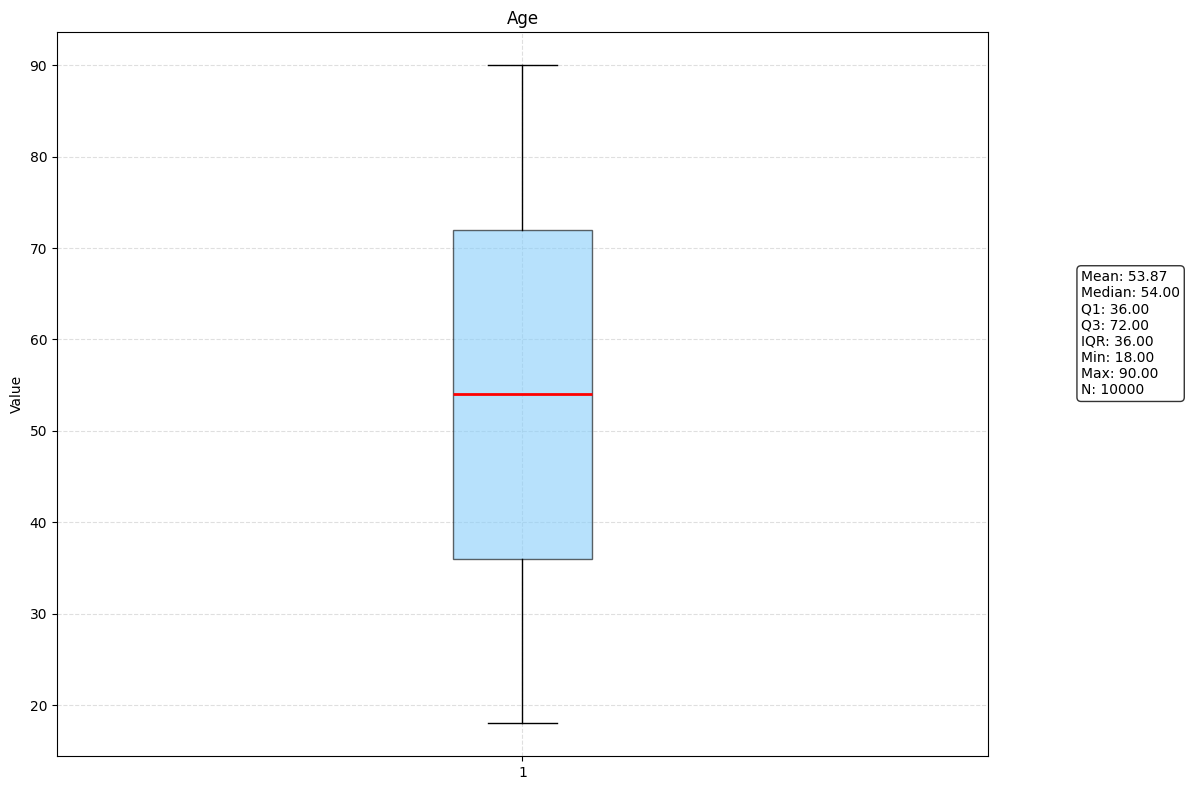

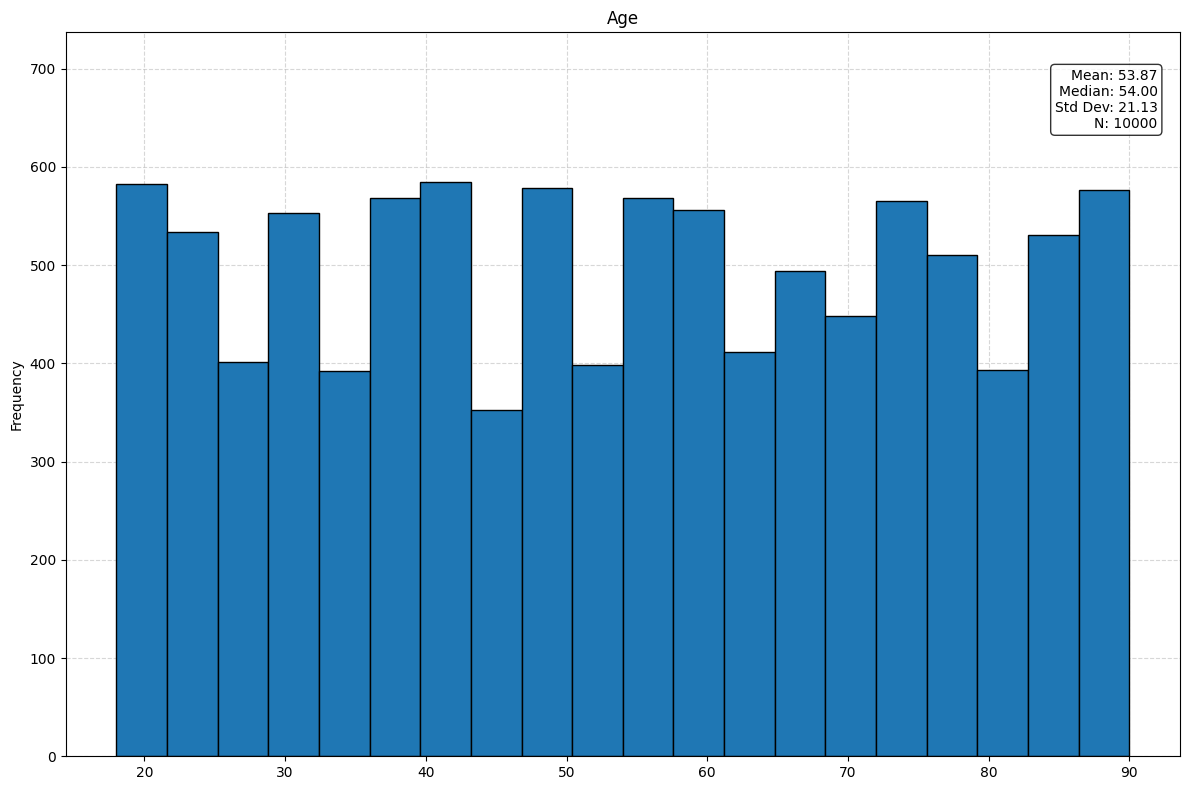

In [51]:
mean_val = mean_own(data_numerik["Age"])
median_val = median_own(data_numerik["Age"])
data_age_sorted = merge_sort(data_numerik["Age"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Age"])
max_val = max_own(data_numerik["Age"])
count_val = len(data_numerik["Age"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Age"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Age")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Age"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Age"])
median_val = np.median(data_numerik["Age"])
std_val = np.std(data_numerik["Age"])
count_val = len(data_numerik["Age"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Kolom ...

Jelaskan kondisi kolom ... berdasarkan hasil plot distribusi disini.

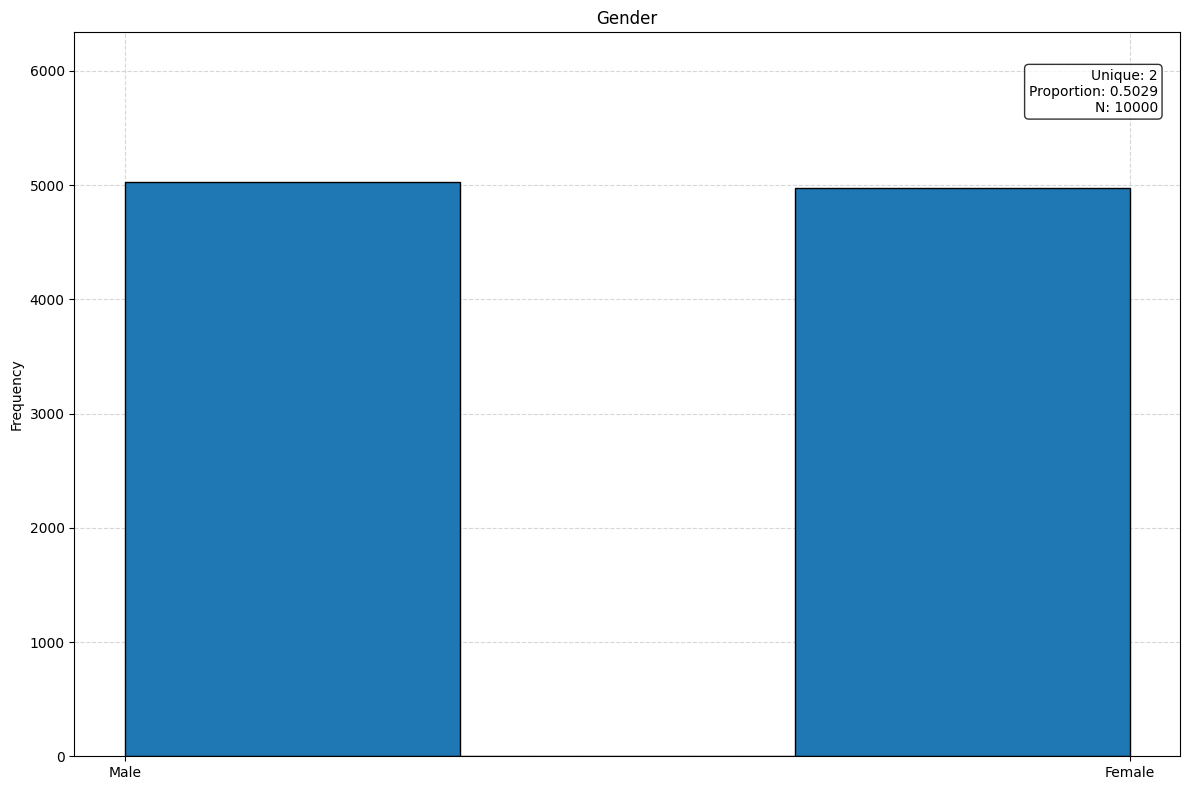

In [52]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Gender"], bins=3, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Gender"])
unique_val = unique_count(data_kategori["Gender"])
prportion_val = proportion(data_kategori["Gender"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Gender")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


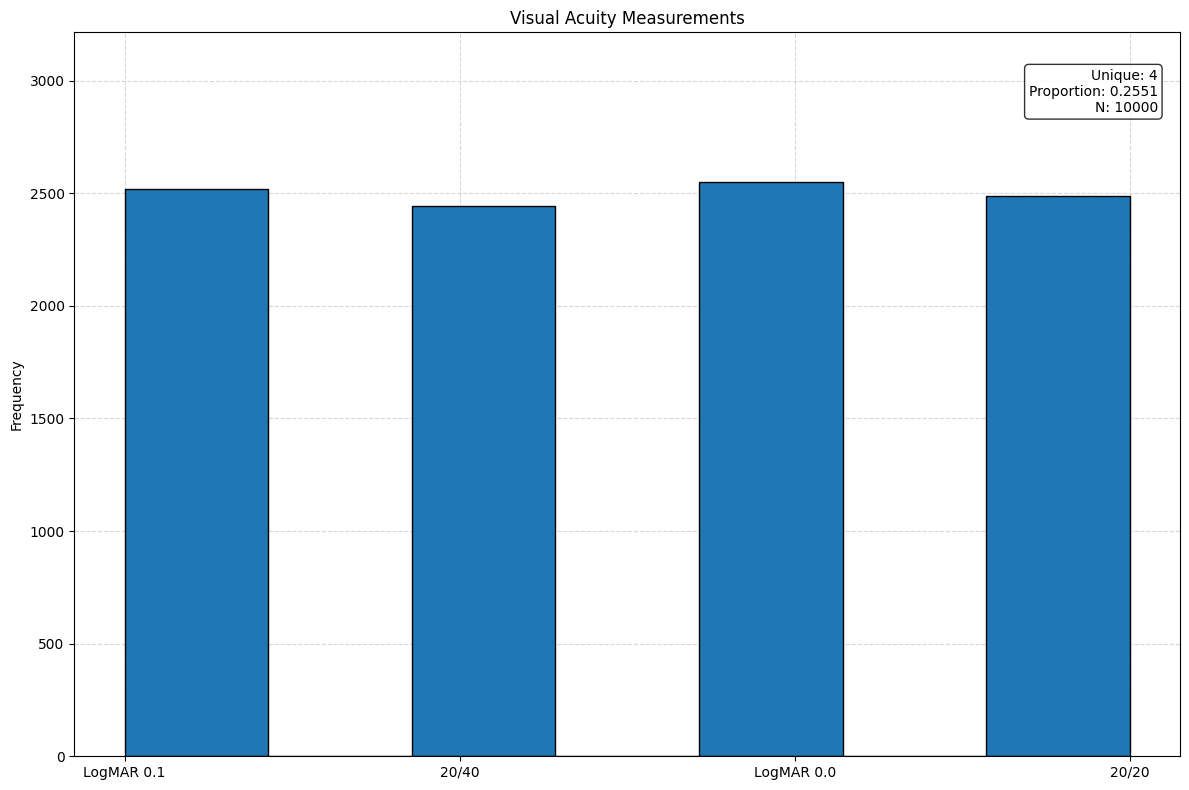

In [53]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Visual Acuity Measurements"], bins=7, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Visual Acuity Measurements"])
unique_val = unique_count(data_kategori["Visual Acuity Measurements"])
prportion_val = proportion(data_kategori["Visual Acuity Measurements"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Visual Acuity Measurements")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

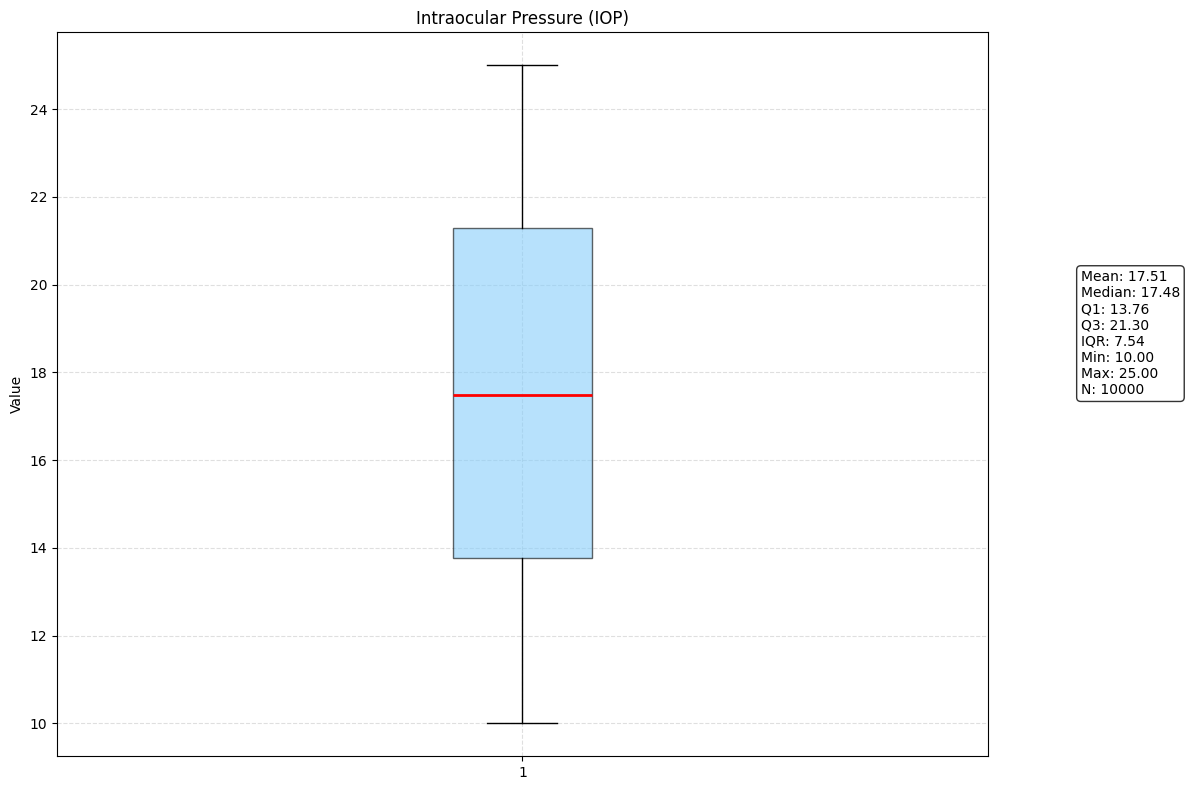

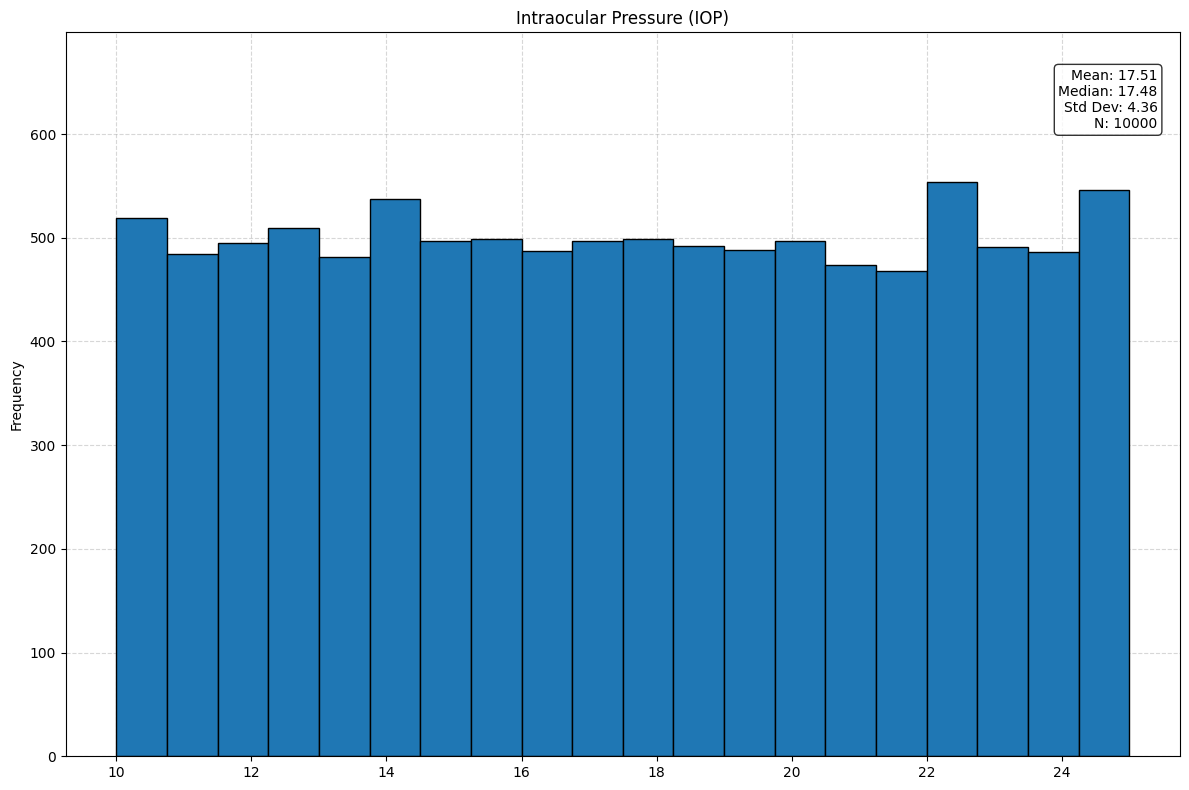

In [54]:
mean_val = mean_own(data_numerik["Intraocular Pressure (IOP)"])
median_val = median_own(data_numerik["Intraocular Pressure (IOP)"])
data_age_sorted = merge_sort(data_numerik["Intraocular Pressure (IOP)"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Intraocular Pressure (IOP)"])
max_val = max_own(data_numerik["Intraocular Pressure (IOP)"])
count_val = len(data_numerik["Intraocular Pressure (IOP)"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Intraocular Pressure (IOP)"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Intraocular Pressure (IOP)")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Intraocular Pressure (IOP)"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Intraocular Pressure (IOP)"])
median_val = np.median(data_numerik["Intraocular Pressure (IOP)"])
std_val = np.std(data_numerik["Intraocular Pressure (IOP)"])
count_val = len(data_numerik["Intraocular Pressure (IOP)"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Intraocular Pressure (IOP)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


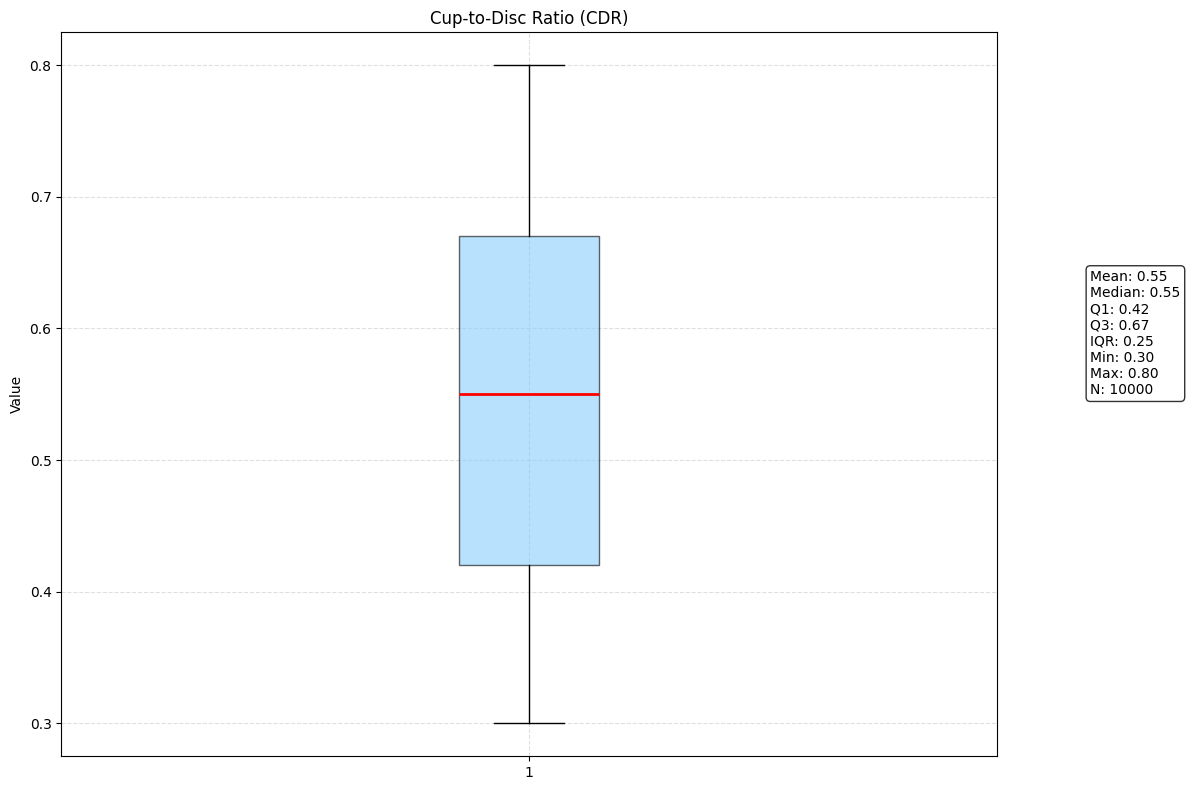

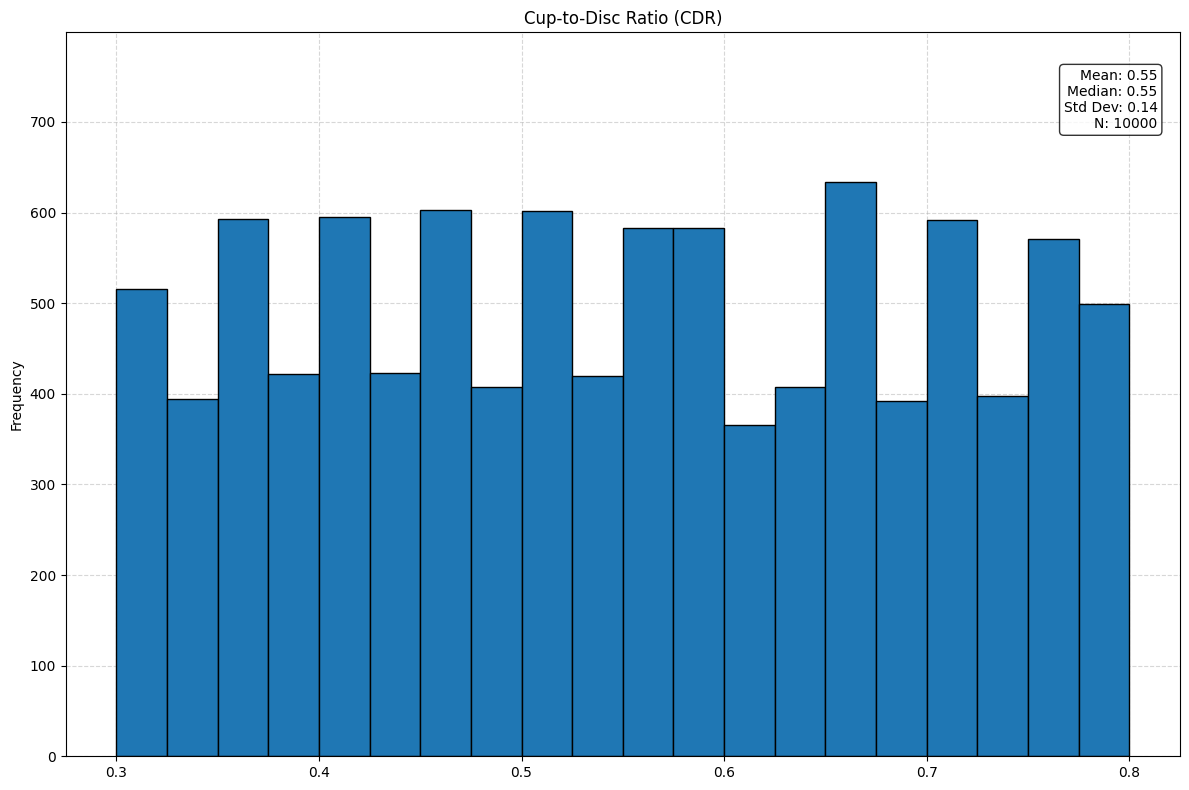

In [55]:
mean_val = mean_own(data_numerik["Cup-to-Disc Ratio (CDR)"])
median_val = median_own(data_numerik["Cup-to-Disc Ratio (CDR)"])
data_age_sorted = merge_sort(data_numerik["Cup-to-Disc Ratio (CDR)"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Cup-to-Disc Ratio (CDR)"])
max_val = max_own(data_numerik["Cup-to-Disc Ratio (CDR)"])
count_val = len(data_numerik["Cup-to-Disc Ratio (CDR)"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Cup-to-Disc Ratio (CDR)"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Cup-to-Disc Ratio (CDR)")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Cup-to-Disc Ratio (CDR)"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Cup-to-Disc Ratio (CDR)"])
median_val = np.median(data_numerik["Cup-to-Disc Ratio (CDR)"])
std_val = np.std(data_numerik["Cup-to-Disc Ratio (CDR)"])
count_val = len(data_numerik["Cup-to-Disc Ratio (CDR)"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Cup-to-Disc Ratio (CDR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


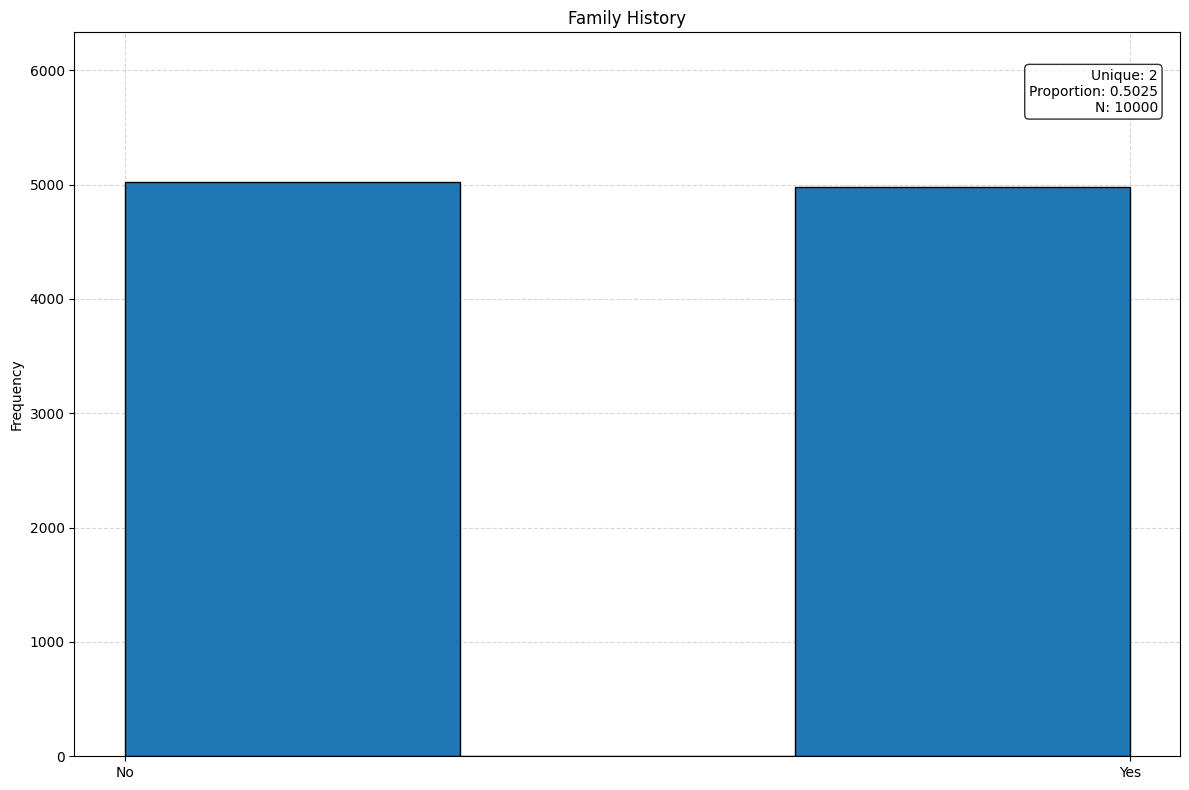

In [56]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Family History"], bins=3, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Family History"])
unique_val = unique_count(data_kategori["Family History"])
prportion_val = proportion(data_kategori["Family History"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Family History")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

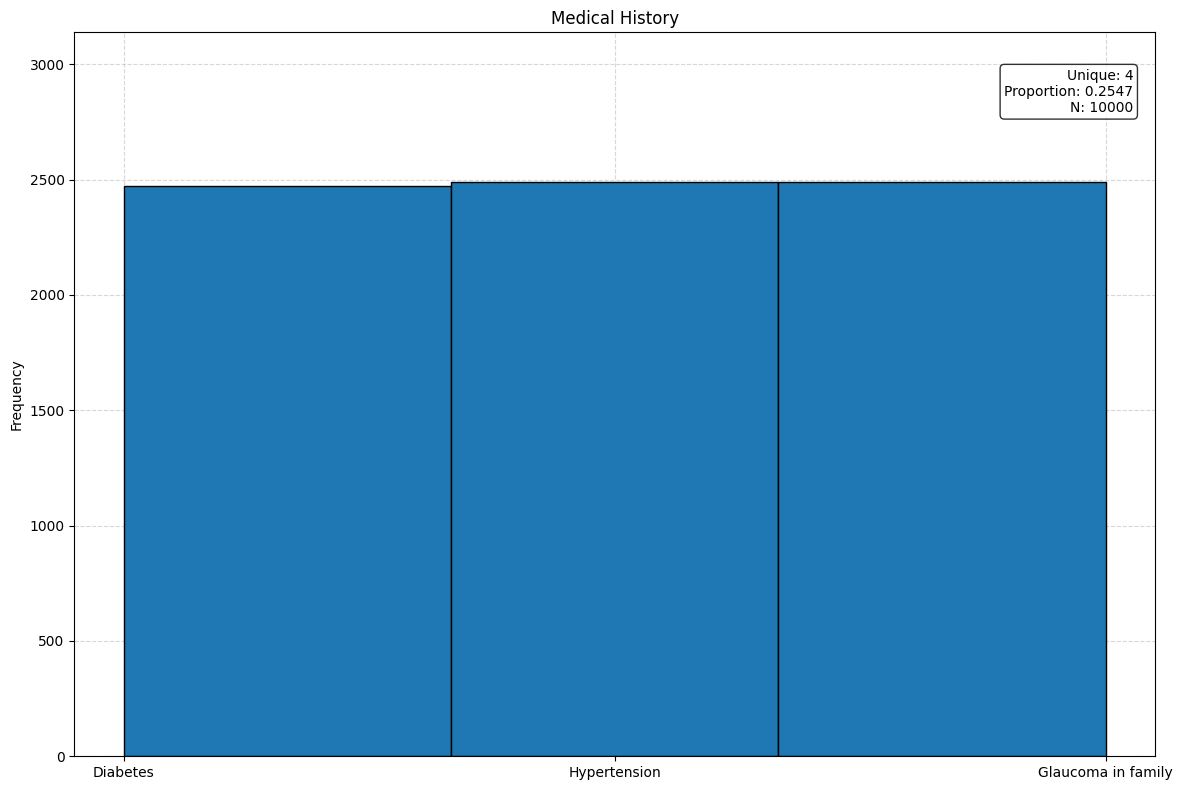

In [57]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Medical History"].dropna(), bins=3, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Medical History"])
unique_val = unique_count(data_kategori["Medical History"])
prportion_val = proportion(data_kategori["Medical History"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Medical History")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

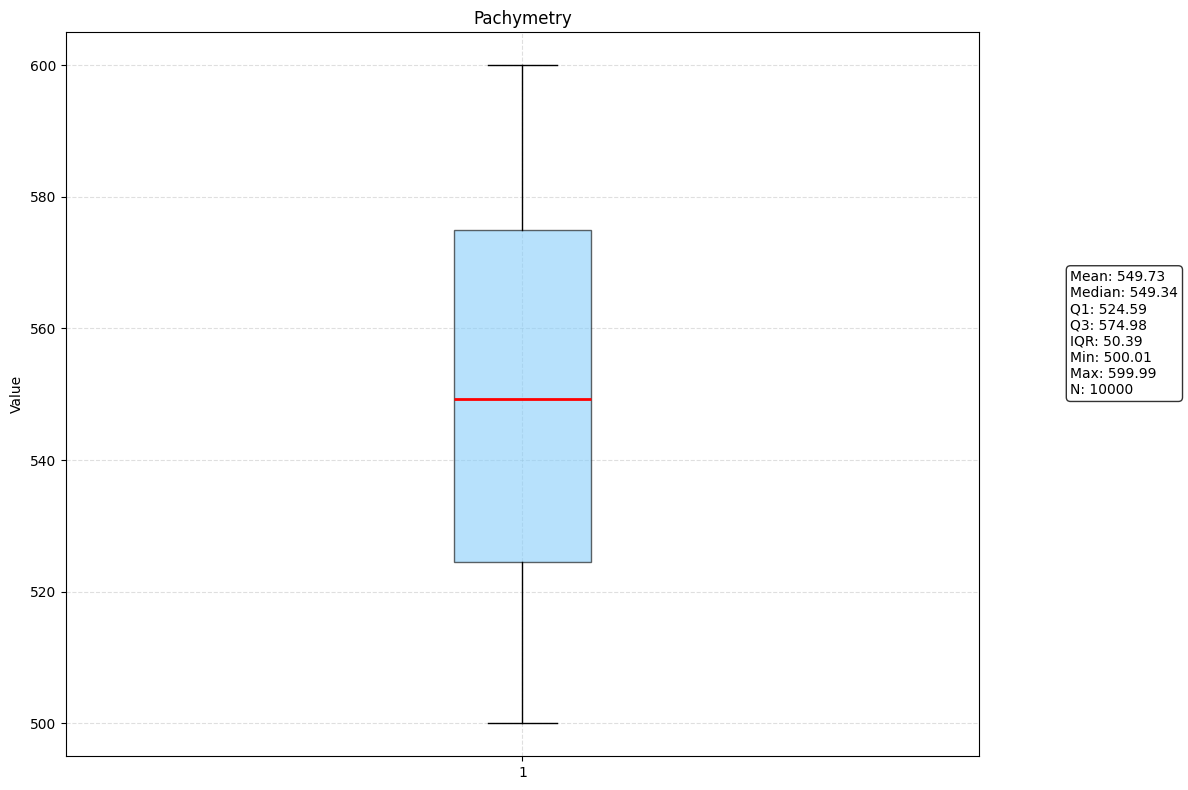

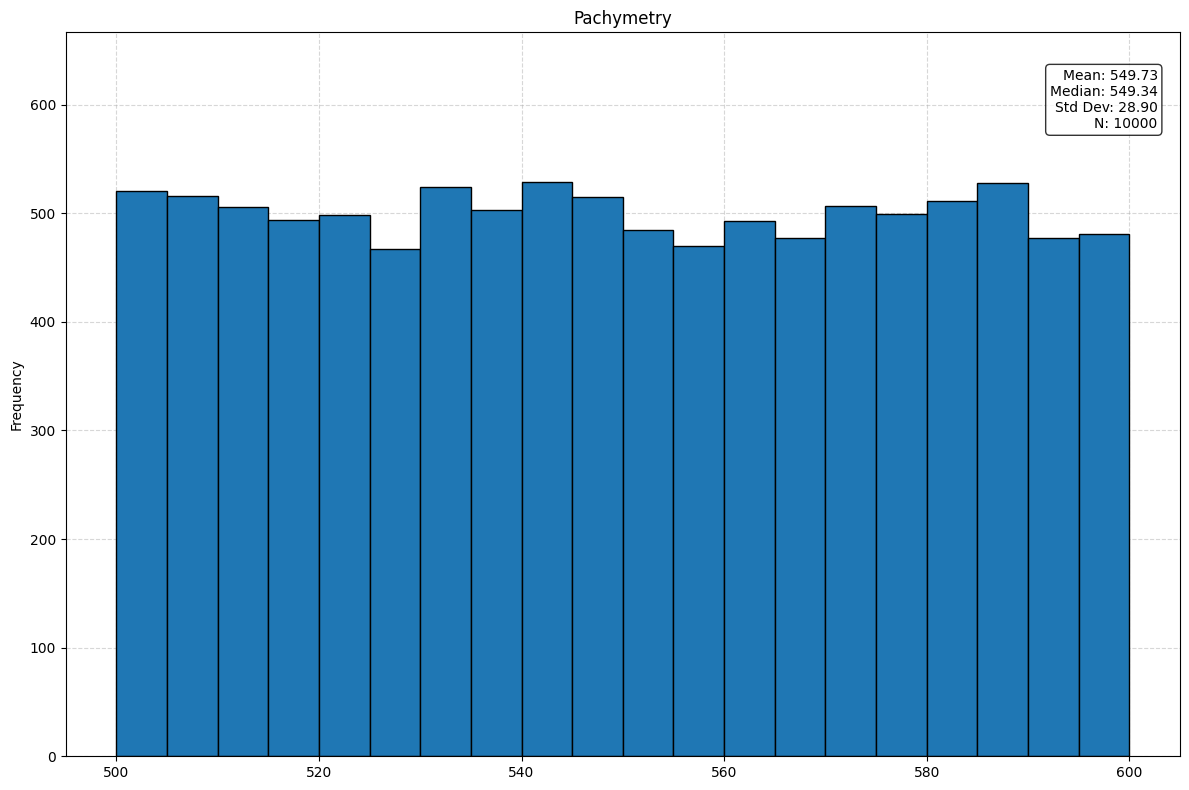

In [58]:
mean_val = mean_own(data_numerik["Pachymetry"])
median_val = median_own(data_numerik["Pachymetry"])
data_age_sorted = merge_sort(data_numerik["Pachymetry"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Pachymetry"])
max_val = max_own(data_numerik["Pachymetry"])
count_val = len(data_numerik["Pachymetry"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Pachymetry"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Pachymetry")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Pachymetry"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Pachymetry"])
median_val = np.median(data_numerik["Pachymetry"])
std_val = np.std(data_numerik["Pachymetry"])
count_val = len(data_numerik["Pachymetry"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Pachymetry")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


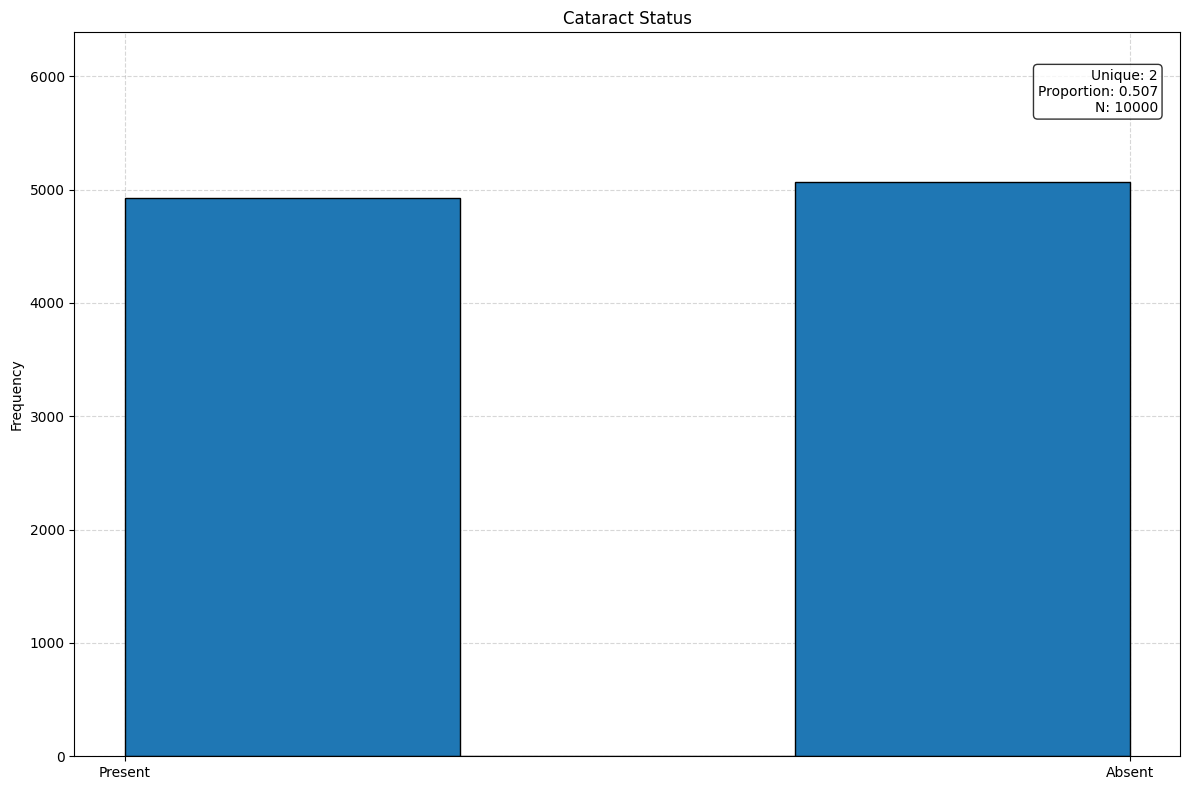

In [59]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Cataract Status"].dropna(), bins=3, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Cataract Status"])
unique_val = unique_count(data_kategori["Cataract Status"])
prportion_val = proportion(data_kategori["Cataract Status"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Cataract Status")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

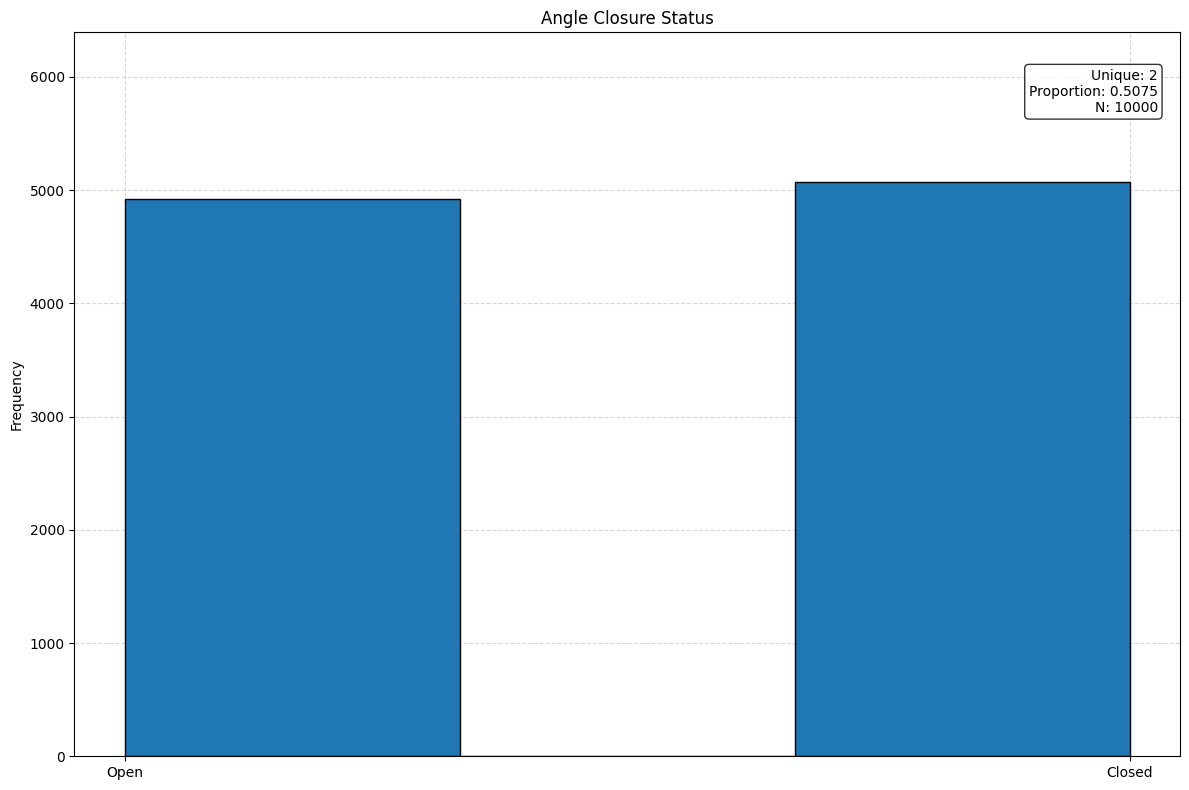

In [60]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Angle Closure Status"].dropna(), bins=3, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Angle Closure Status"])
unique_val = unique_count(data_kategori["Angle Closure Status"])
prportion_val = proportion(data_kategori["Angle Closure Status"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Angle Closure Status")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [61]:
# plt.figure(figsize=(12,8))

# plt.hist(data_kategori["Visual Symptoms"].dropna(), bins=10000, edgecolor='black', zorder=2)
# plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

# count_val = len(data_kategori["Visual Symptoms"])
# unique_val = unique_count(data_kategori["Visual Symptoms"])
# prportion_val = proportion(data_kategori["Visual Symptoms"])

# stats_text = (
#     f"Unique: {unique_val}\n"
#     f"Proportion: {prportion_val}\n"
#     f"N: {count_val}"
# )

# plt.ylim(top=plt.ylim()[1] * 1.20)

# plt.annotate(
#     stats_text,
#     xy=(0.98, 0.95), xycoords='axes fraction',
#     ha='right', va='top',
#     fontsize=10,
#     bbox=dict(boxstyle="round", fc="white", alpha=0.8)
# )

# plt.title("Visual Symptoms")
# plt.ylabel("Frequency")
# plt.tight_layout()
# plt.show()

# Pakai Top-N visualisasi 

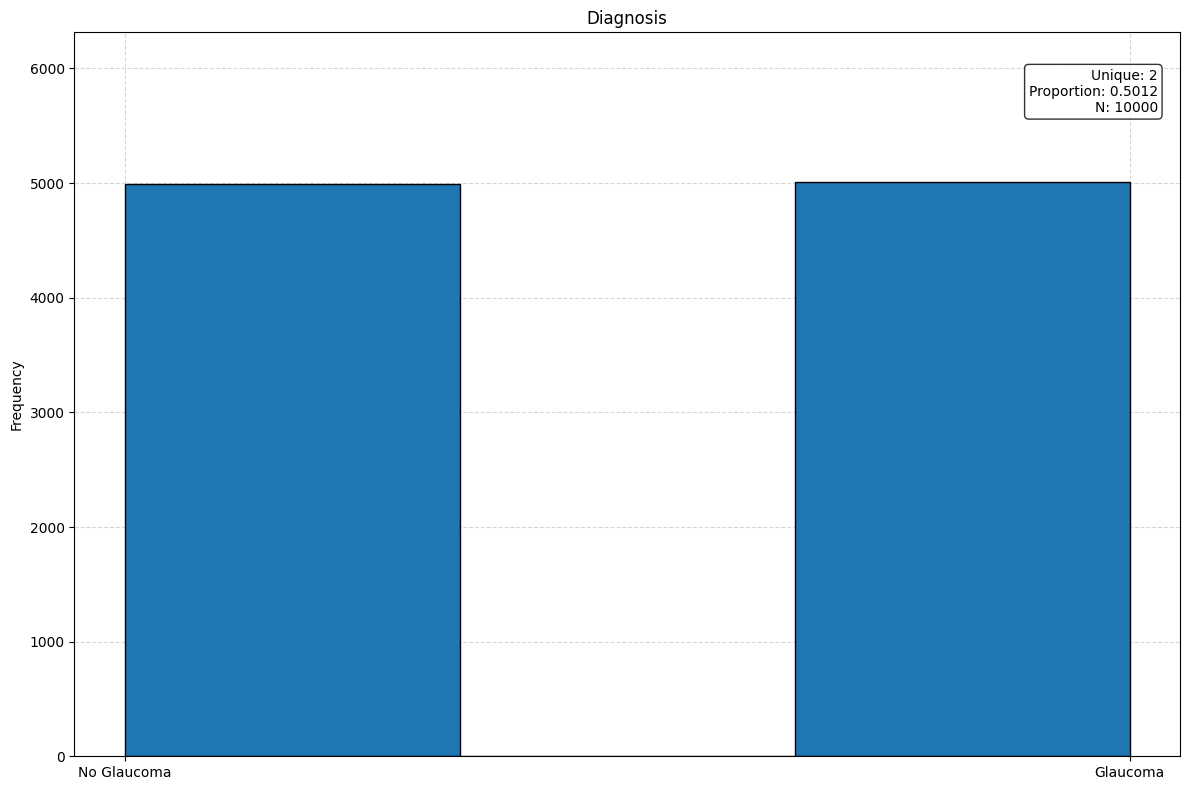

In [62]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Diagnosis"].dropna(), bins=3, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Diagnosis"])
unique_val = unique_count(data_kategori["Diagnosis"])
prportion_val = proportion(data_kategori["Diagnosis"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Diagnosis")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

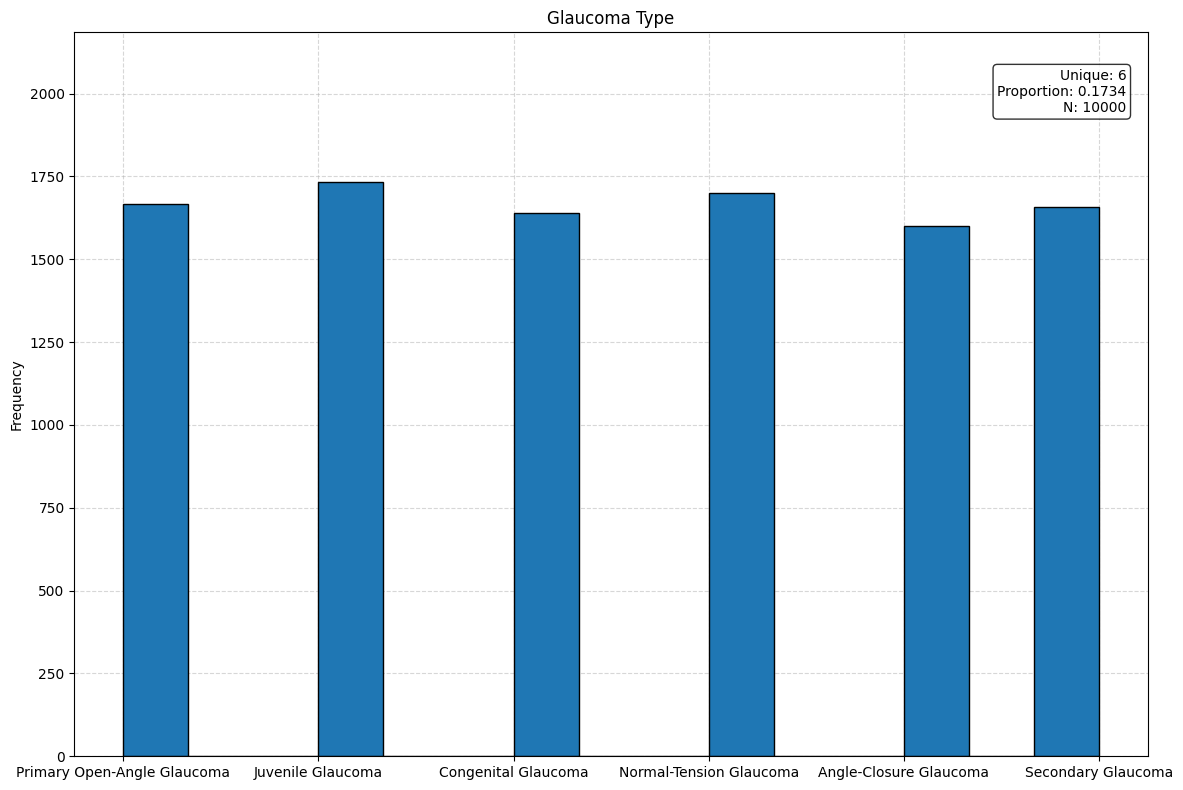

In [63]:
plt.figure(figsize=(12,8))

plt.hist(data_kategori["Glaucoma Type"].dropna(), bins=15, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

count_val = len(data_kategori["Glaucoma Type"])
unique_val = unique_count(data_kategori["Glaucoma Type"])
prportion_val = proportion(data_kategori["Glaucoma Type"])

stats_text = (
    f"Unique: {unique_val}\n"
    f"Proportion: {prportion_val}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Glaucoma Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

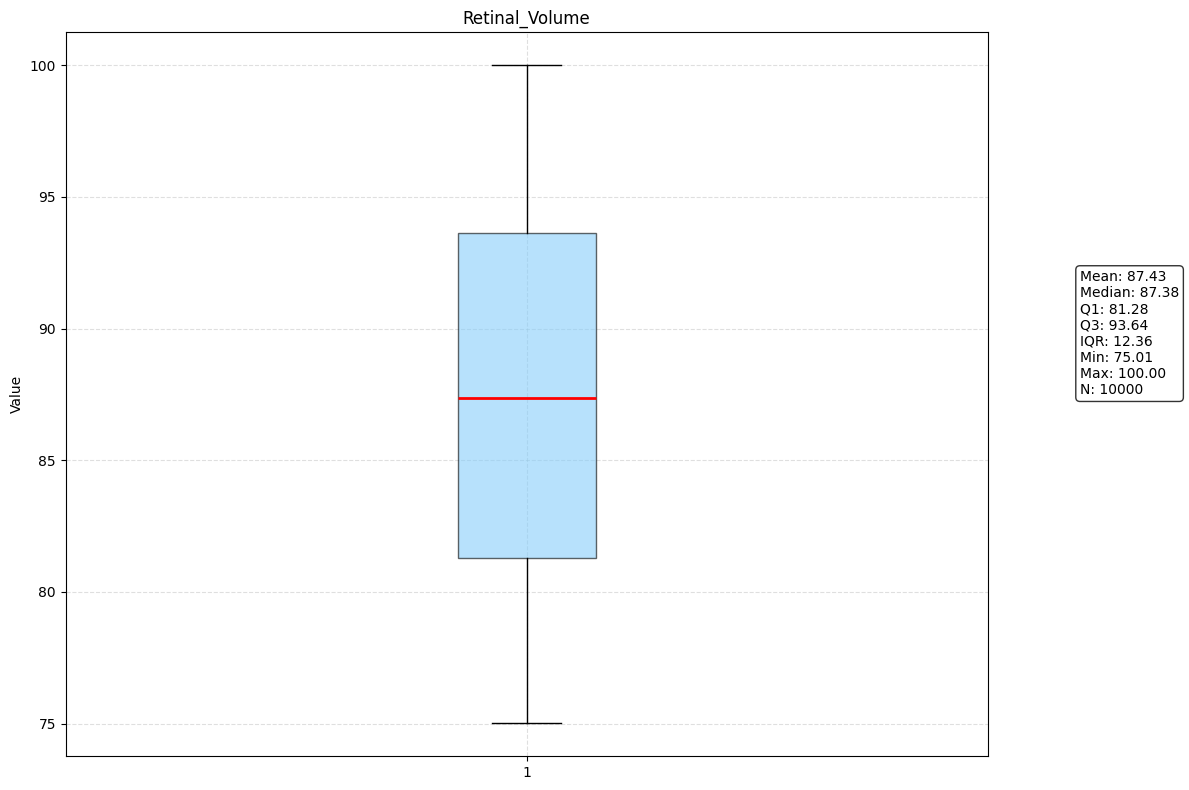

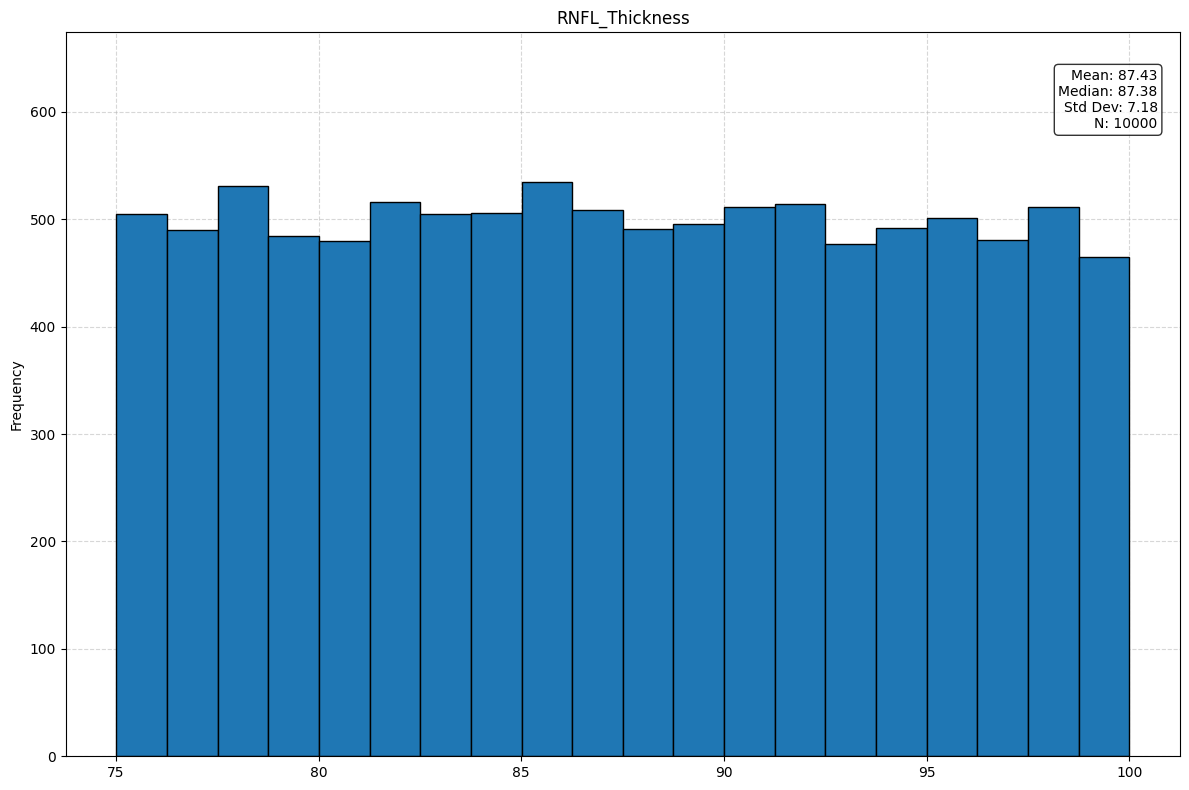

In [64]:
mean_val = mean_own(data_numerik["RNFL_Thickness"])
median_val = median_own(data_numerik["RNFL_Thickness"])
data_age_sorted = merge_sort(data_numerik["RNFL_Thickness"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["RNFL_Thickness"])
max_val = max_own(data_numerik["RNFL_Thickness"])
count_val = len(data_numerik["RNFL_Thickness"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["RNFL_Thickness"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Retinal_Volume")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["RNFL_Thickness"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["RNFL_Thickness"])
median_val = np.median(data_numerik["RNFL_Thickness"])
std_val = np.std(data_numerik["RNFL_Thickness"])
count_val = len(data_numerik["RNFL_Thickness"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("RNFL_Thickness")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


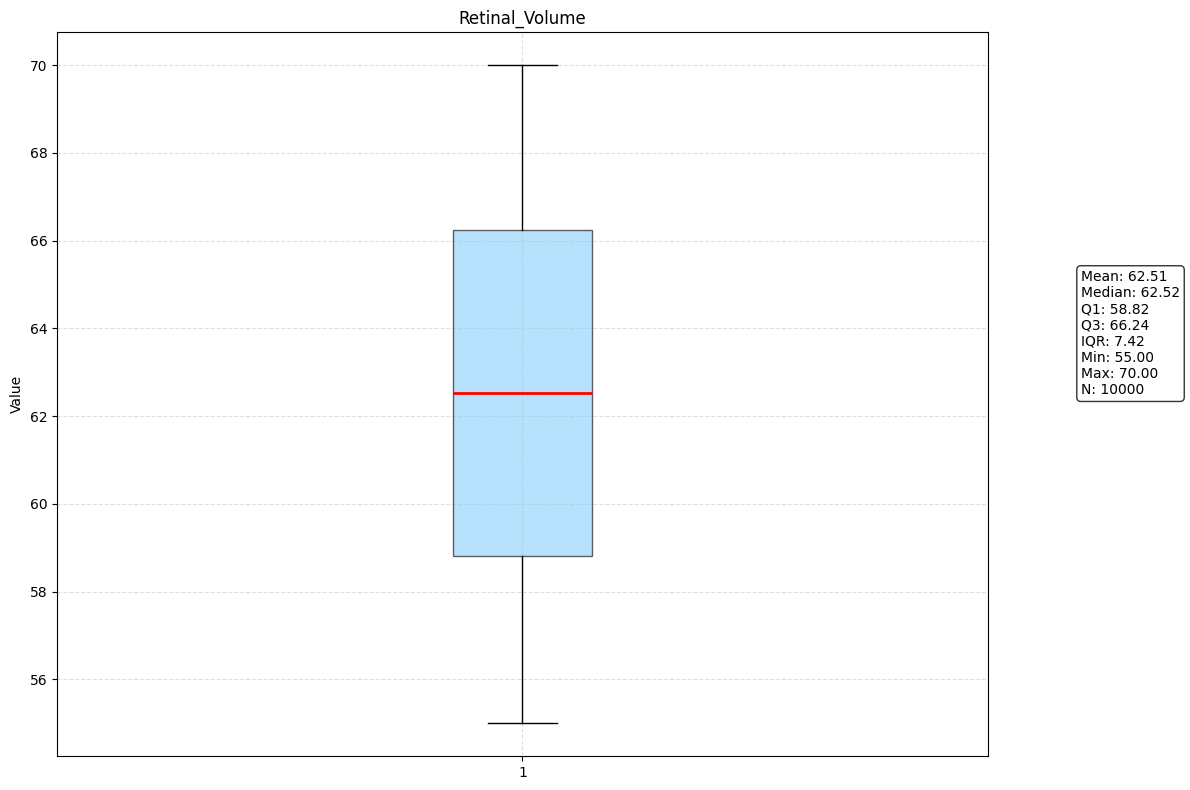

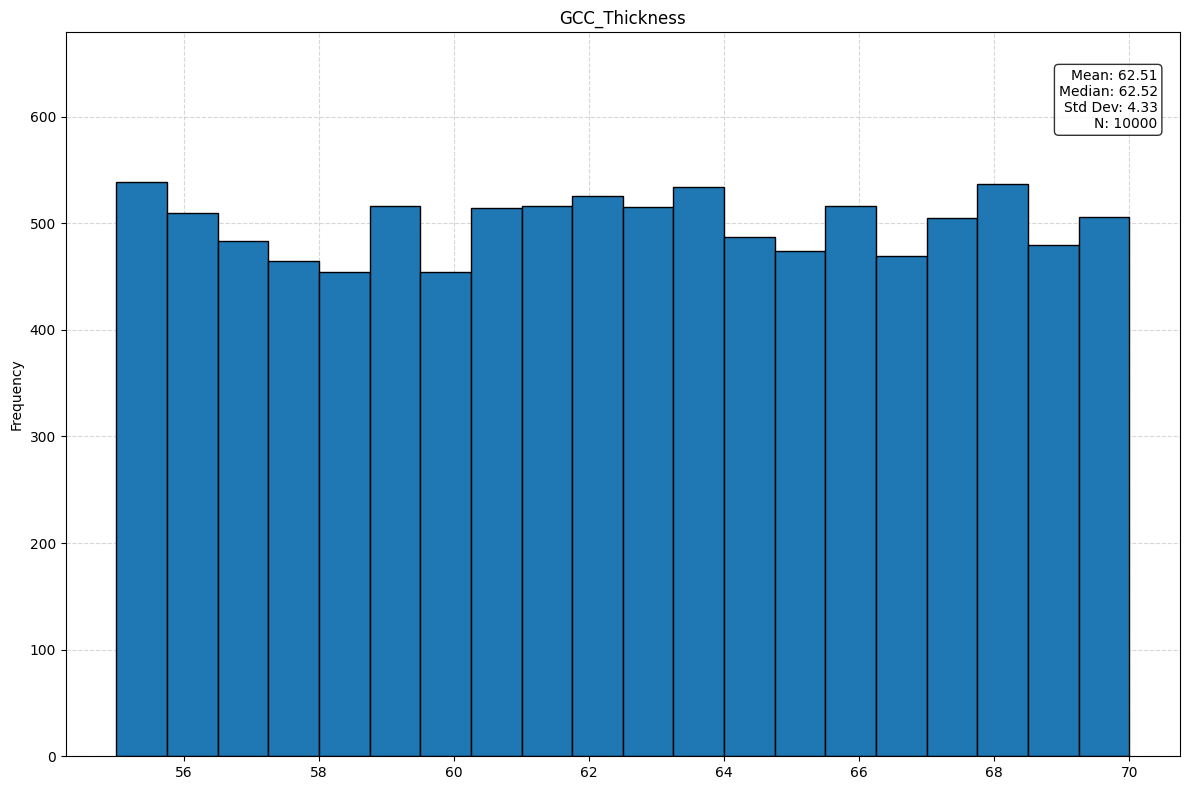

In [65]:
mean_val = mean_own(data_numerik["GCC_Thickness"])
median_val = median_own(data_numerik["GCC_Thickness"])
data_age_sorted = merge_sort(data_numerik["GCC_Thickness"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["GCC_Thickness"])
max_val = max_own(data_numerik["GCC_Thickness"])
count_val = len(data_numerik["GCC_Thickness"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["GCC_Thickness"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Retinal_Volume")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["GCC_Thickness"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["GCC_Thickness"])
median_val = np.median(data_numerik["GCC_Thickness"])
std_val = np.std(data_numerik["GCC_Thickness"])
count_val = len(data_numerik["GCC_Thickness"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("GCC_Thickness")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


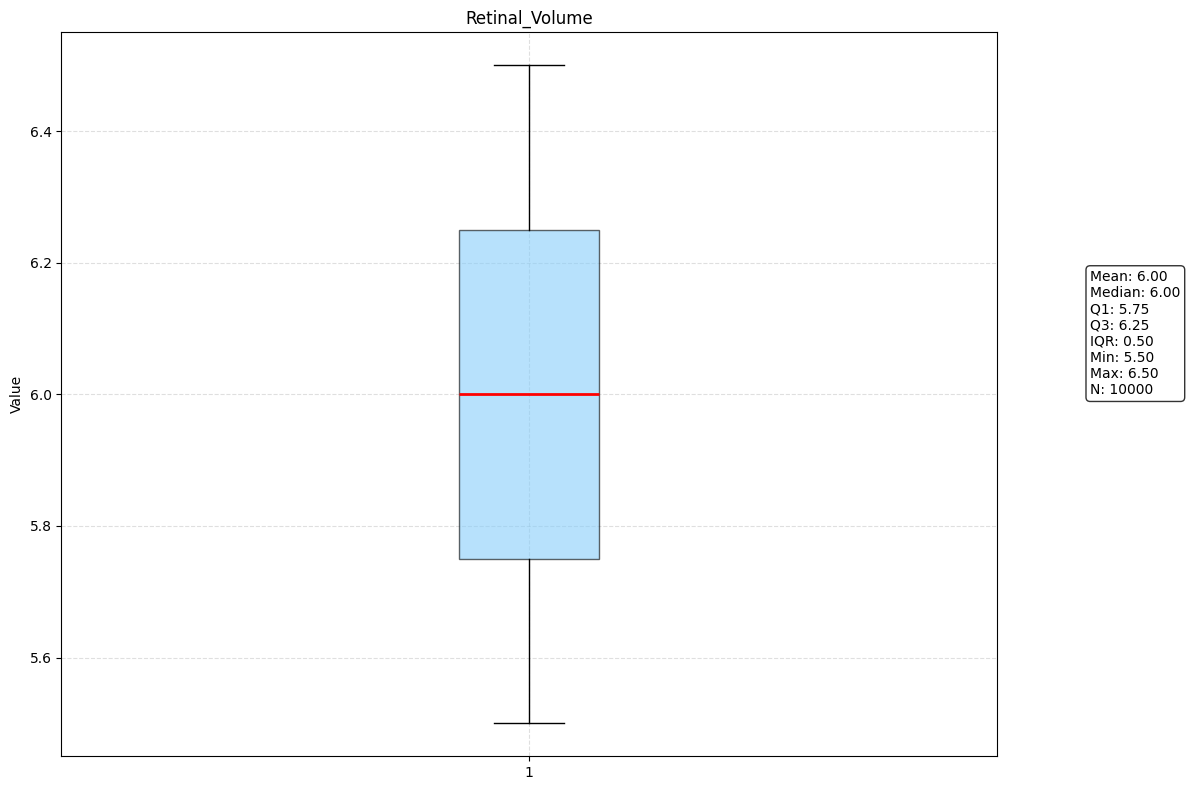

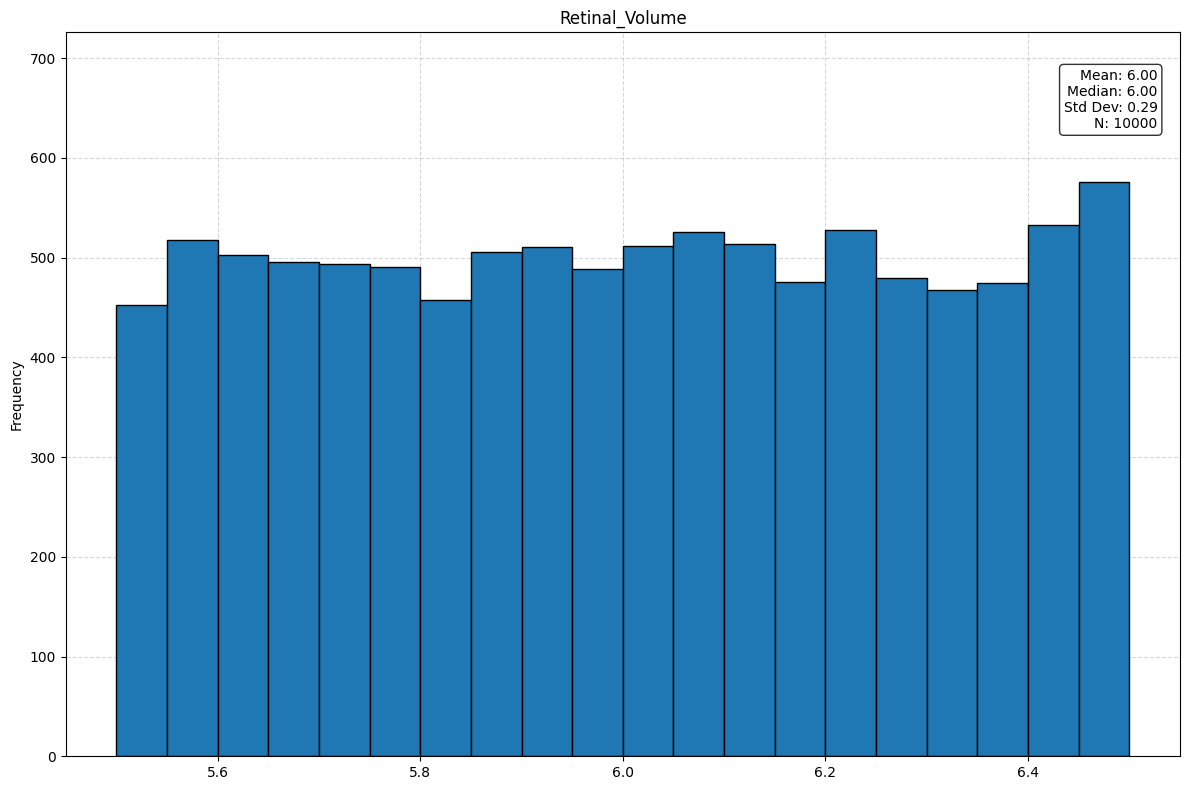

In [66]:
mean_val = mean_own(data_numerik["Retinal_Volume"])
median_val = median_own(data_numerik["Retinal_Volume"])
data_age_sorted = merge_sort(data_numerik["Retinal_Volume"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Retinal_Volume"])
max_val = max_own(data_numerik["Retinal_Volume"])
count_val = len(data_numerik["Retinal_Volume"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Retinal_Volume"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Retinal_Volume")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Retinal_Volume"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Retinal_Volume"])
median_val = np.median(data_numerik["Retinal_Volume"])
std_val = np.std(data_numerik["Retinal_Volume"])
count_val = len(data_numerik["Retinal_Volume"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Retinal_Volume")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


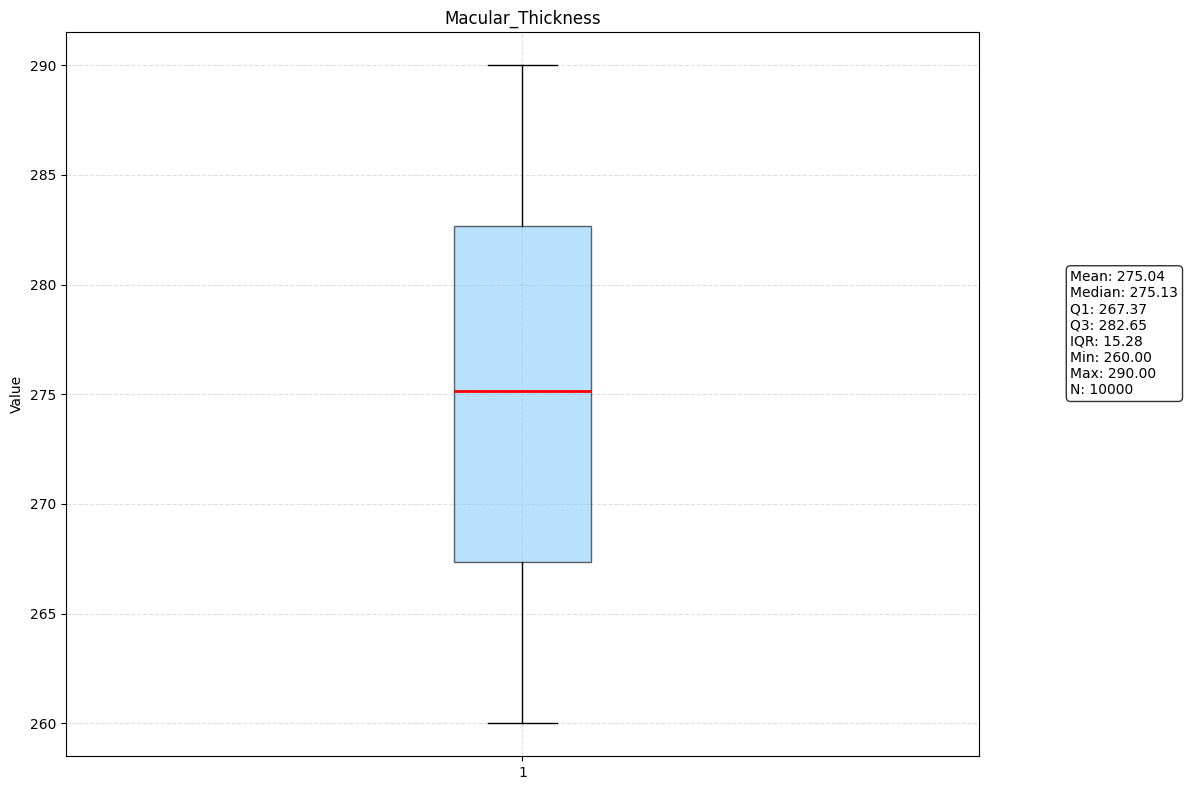

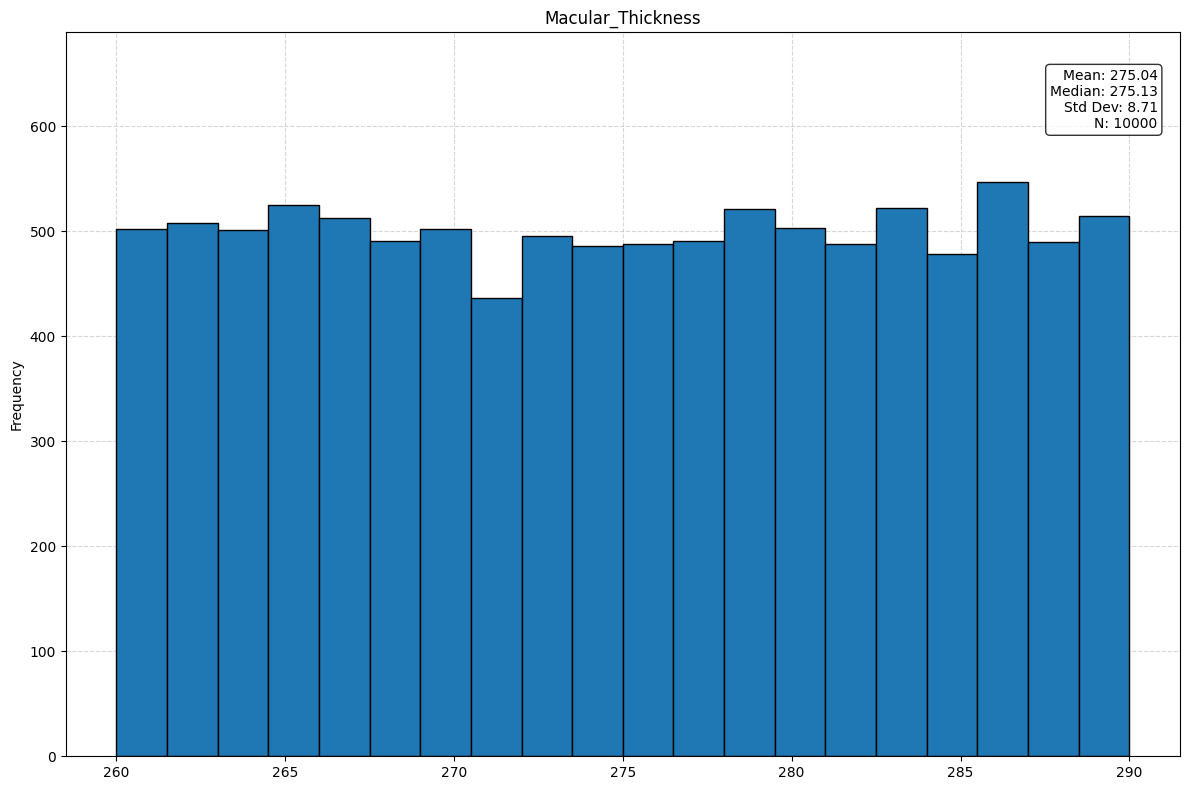

In [67]:
mean_val = mean_own(data_numerik["Macular_Thickness"])
median_val = median_own(data_numerik["Macular_Thickness"])
data_age_sorted = merge_sort(data_numerik["Macular_Thickness"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Macular_Thickness"])
max_val = max_own(data_numerik["Macular_Thickness"])
count_val = len(data_numerik["Macular_Thickness"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Macular_Thickness"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Macular_Thickness")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Macular_Thickness"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Macular_Thickness"])
median_val = np.median(data_numerik["Macular_Thickness"])
std_val = np.std(data_numerik["Macular_Thickness"])
count_val = len(data_numerik["Macular_Thickness"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Macular_Thickness")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


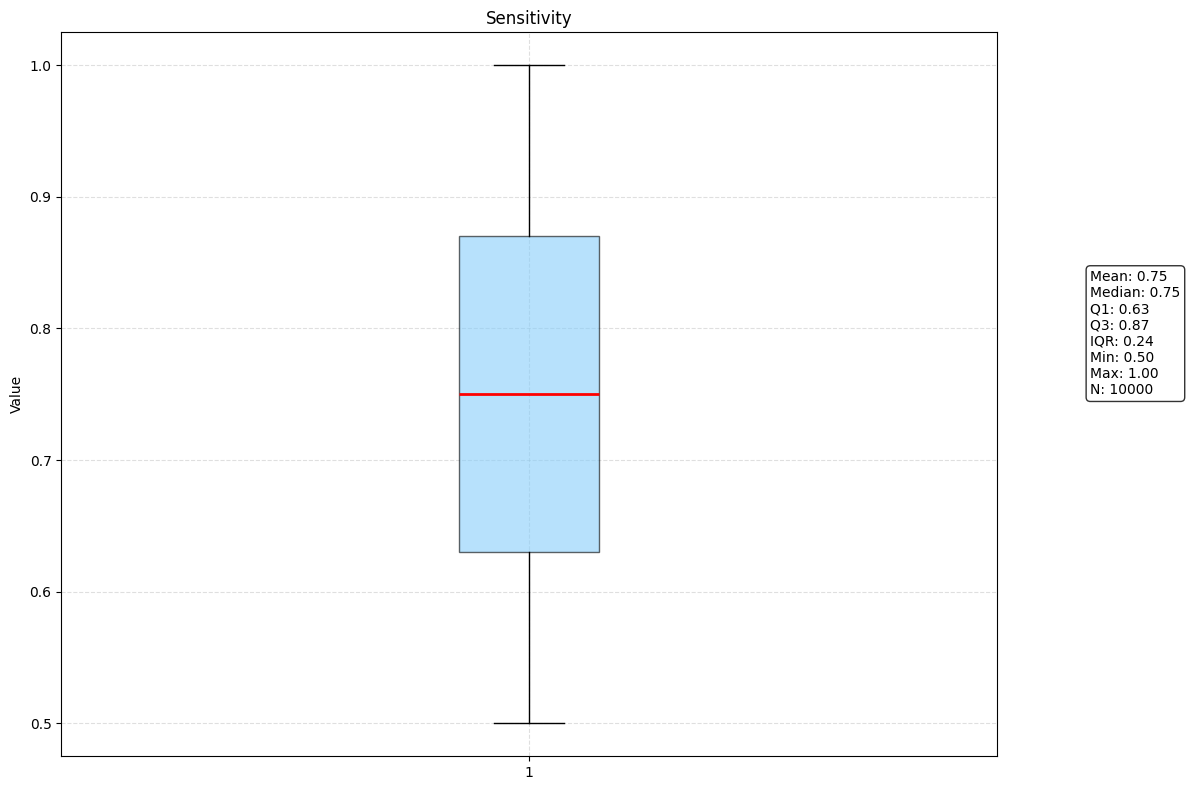

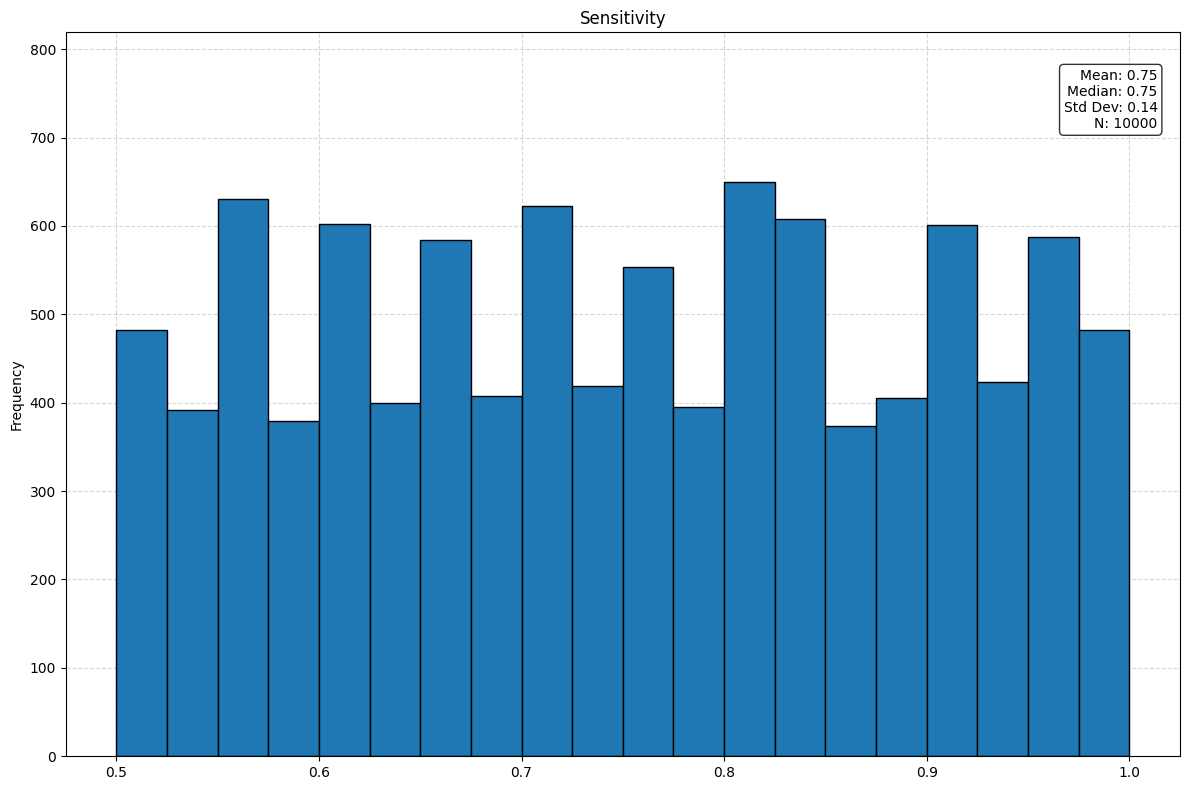

In [68]:
mean_val = mean_own(data_numerik["Sensitivity"])
median_val = median_own(data_numerik["Sensitivity"])
data_age_sorted = merge_sort(data_numerik["Sensitivity"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Sensitivity"])
max_val = max_own(data_numerik["Sensitivity"])
count_val = len(data_numerik["Sensitivity"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Sensitivity"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Sensitivity")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Sensitivity"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Sensitivity"])
median_val = np.median(data_numerik["Sensitivity"])
std_val = np.std(data_numerik["Sensitivity"])
count_val = len(data_numerik["Sensitivity"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Sensitivity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


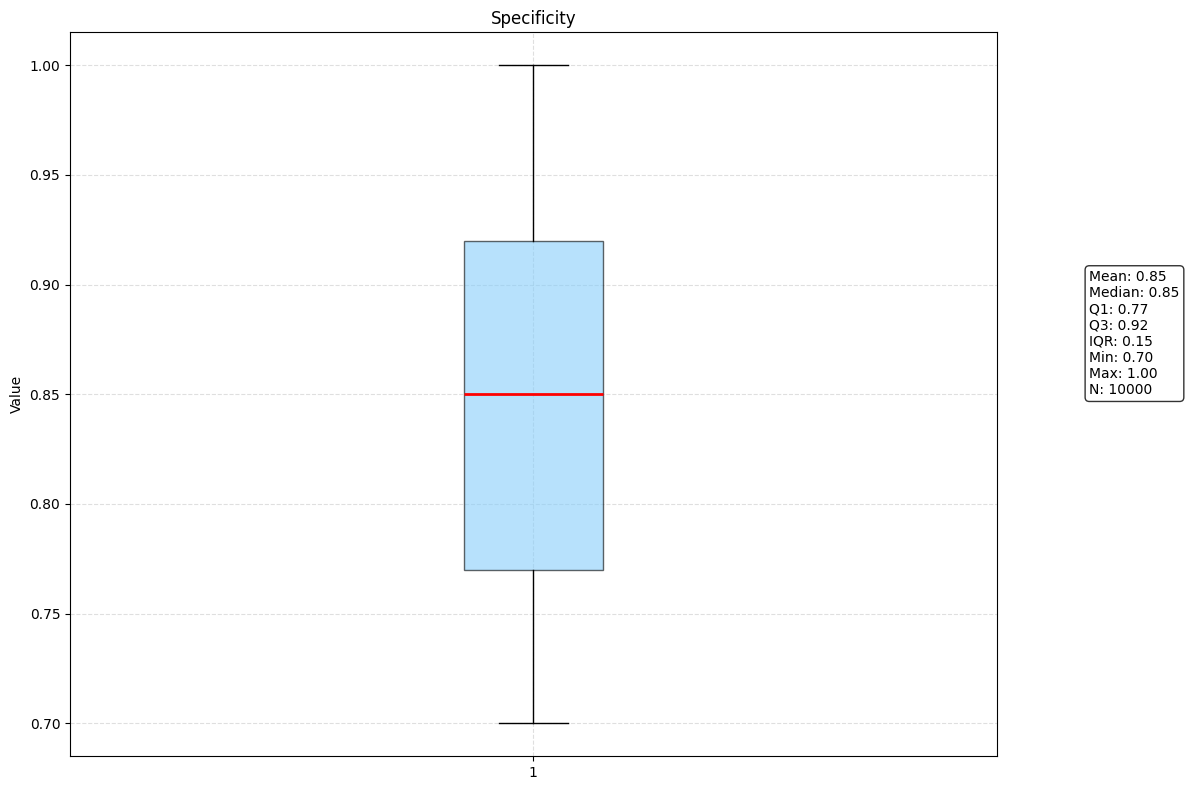

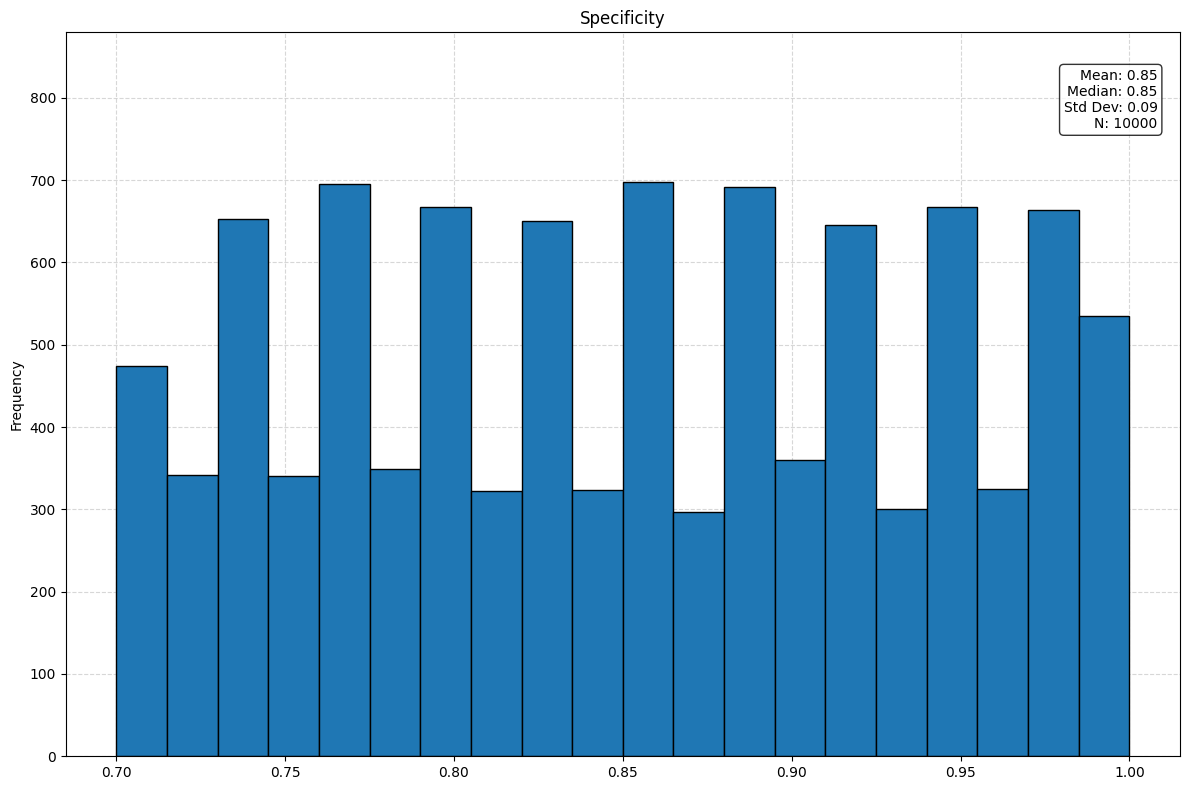

In [69]:
mean_val = mean_own(data_numerik["Specificity"])
median_val = median_own(data_numerik["Specificity"])
data_age_sorted = merge_sort(data_numerik["Specificity"].dropna().tolist())
q1 = quartil_1(data_age_sorted)
q3 = quartil_3(data_age_sorted)
iqr = q3 - q1
min_val = min_own(data_numerik["Specificity"])
max_val = max_own(data_numerik["Specificity"])
count_val = len(data_numerik["Specificity"])

fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
ax.boxplot(data_numerik["Specificity"], vert=True, patch_artist=True,
           boxprops=dict(facecolor="#87CEFA", alpha=0.6),
           medianprops=dict(color="red", linewidth=2))

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Q1: {q1:.2f}\n"
    f"Q3: {q3:.2f}\n"
    f"IQR: {iqr:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"N: {count_val}"
)

ax.annotate(
    stats_text,
    xy=(1.10, 0.5),
    xycoords=("axes fraction", "axes fraction"),
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

ax.set_title("Specificity")
ax.set_ylabel("Value")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize=(12,8))

plt.hist(data_numerik["Specificity"], bins=20, edgecolor='black', zorder=2)
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)

mean_val = np.mean(data_numerik["Specificity"])
median_val = np.median(data_numerik["Specificity"])
std_val = np.std(data_numerik["Specificity"])
count_val = len(data_numerik["Specificity"])

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Std Dev: {std_val:.2f}\n"
    f"N: {count_val}"
)

plt.ylim(top=plt.ylim()[1] * 1.20)

plt.annotate(
    stats_text,
    xy=(0.98, 0.95), xycoords='axes fraction',
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle="round", fc="white", alpha=0.8)
)

plt.title("Specificity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Nomor 4
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

Skewness: 0.00630020764988715


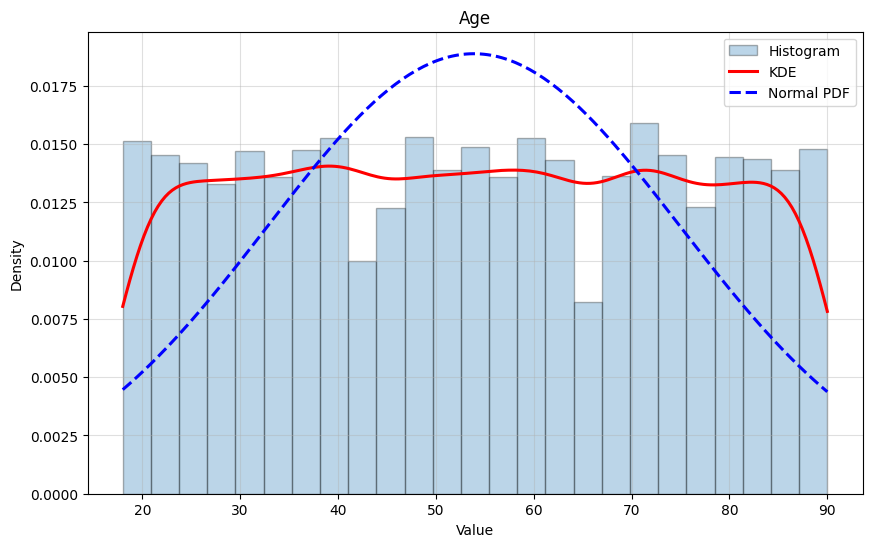

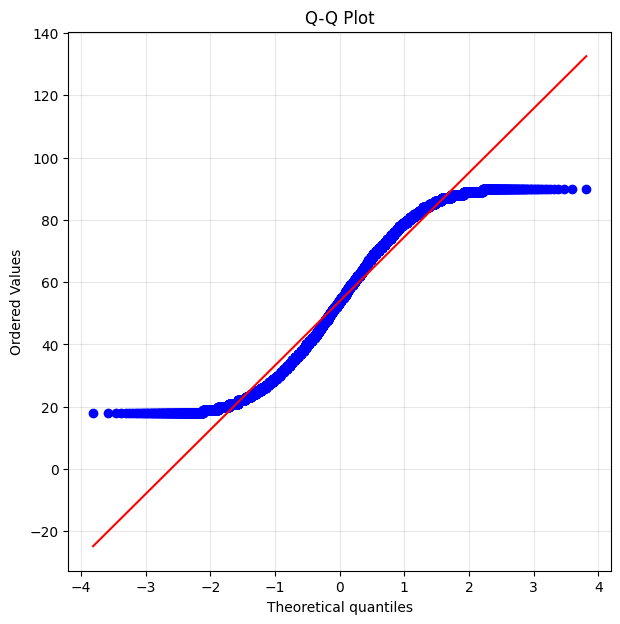

In [ ]:
mean = np.mean(data_numerik["Age"])
std = np.std(data_numerik["Age"])

x = np.linspace(min(data_numerik["Age"]), max(data_numerik["Age"]), 200)

kde = gaussian_kde(data_numerik["Age"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Age"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Age")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Age"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

Jelaskan jenis distribusi kolom ... disini.

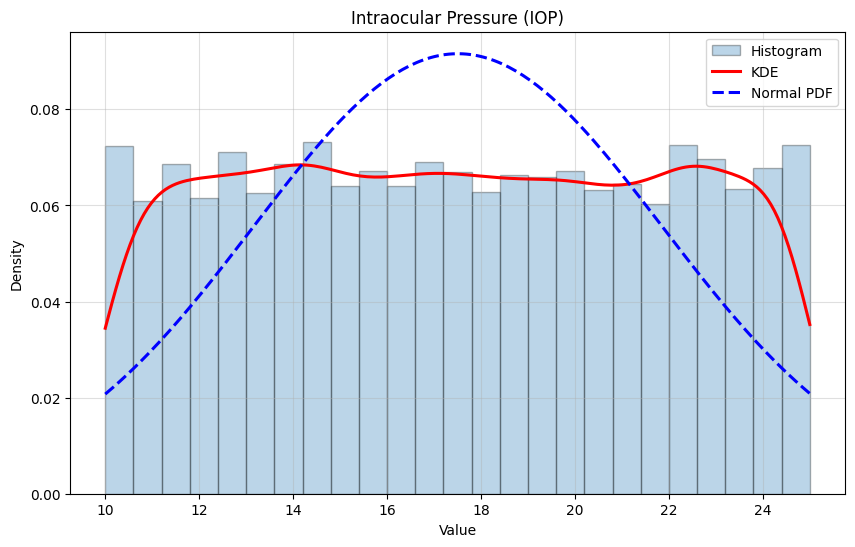

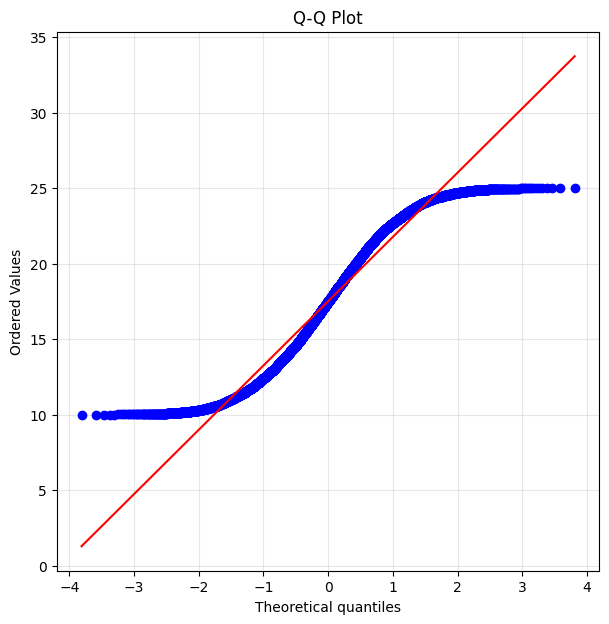

In [82]:
mean = np.mean(data_numerik["Intraocular Pressure (IOP)"])
std = np.std(data_numerik["Intraocular Pressure (IOP)"])

x = np.linspace(min(data_numerik["Intraocular Pressure (IOP)"]), max(data_numerik["Intraocular Pressure (IOP)"]), 200)

kde = gaussian_kde(data_numerik["Intraocular Pressure (IOP)"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Intraocular Pressure (IOP)"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Intraocular Pressure (IOP)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Intraocular Pressure (IOP)"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

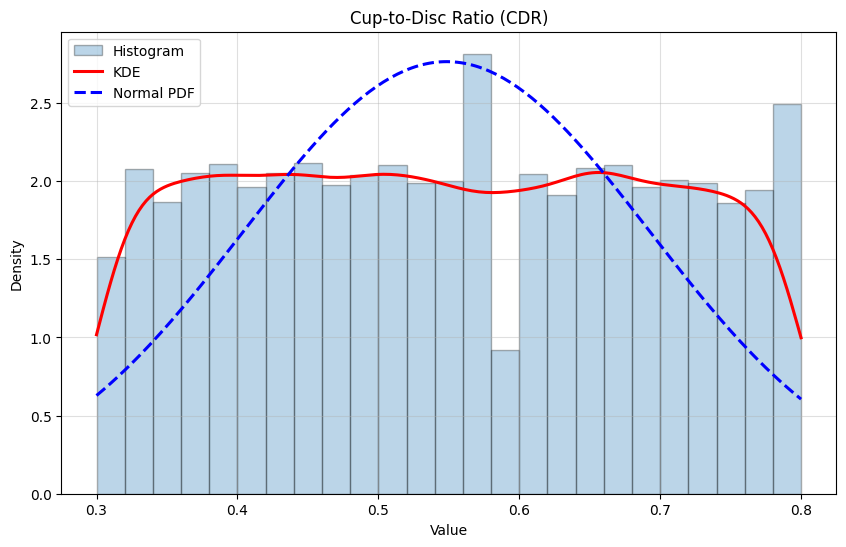

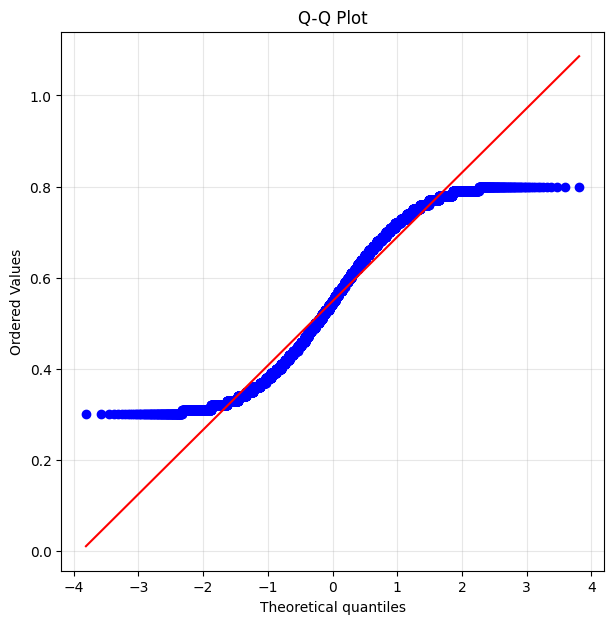

In [84]:
mean = np.mean(data_numerik["Cup-to-Disc Ratio (CDR)"])
std = np.std(data_numerik["Cup-to-Disc Ratio (CDR)"])

x = np.linspace(min(data_numerik["Cup-to-Disc Ratio (CDR)"]), max(data_numerik["Cup-to-Disc Ratio (CDR)"]), 200)

kde = gaussian_kde(data_numerik["Cup-to-Disc Ratio (CDR)"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Cup-to-Disc Ratio (CDR)"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Cup-to-Disc Ratio (CDR)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Cup-to-Disc Ratio (CDR)"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

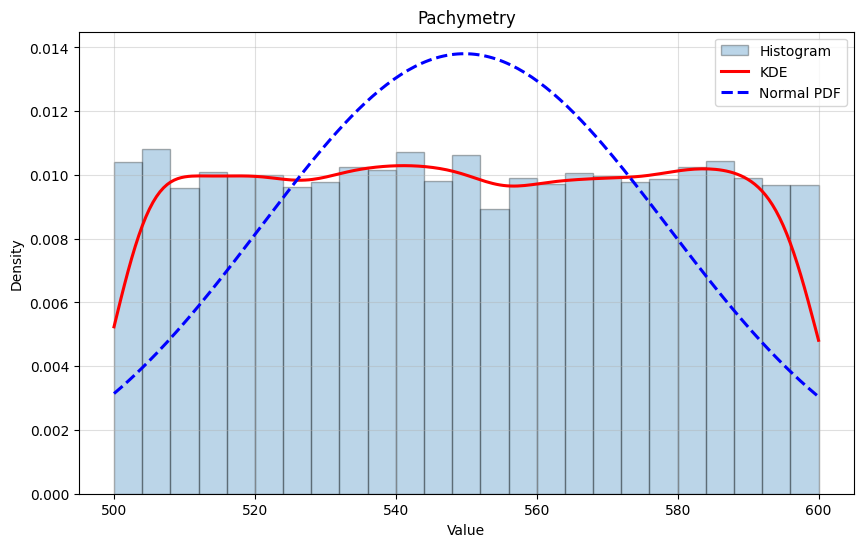

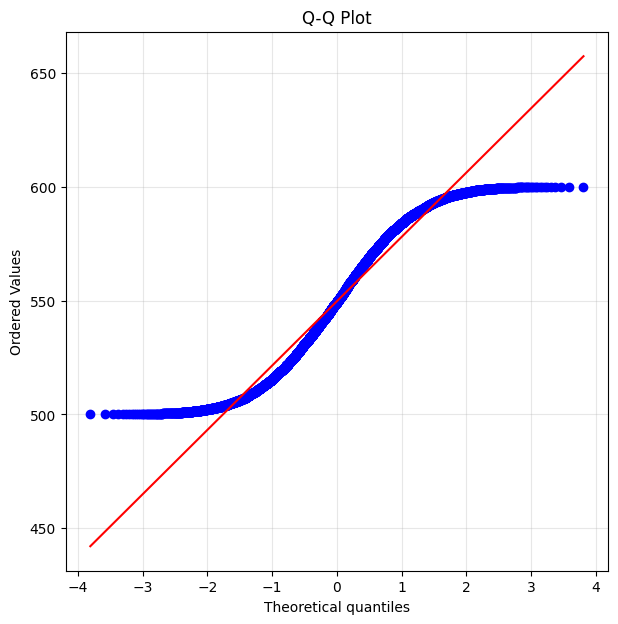

In [85]:
mean = np.mean(data_numerik["Pachymetry"])
std = np.std(data_numerik["Pachymetry"])

x = np.linspace(min(data_numerik["Pachymetry"]), max(data_numerik["Pachymetry"]), 200)

kde = gaussian_kde(data_numerik["Pachymetry"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Pachymetry"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Pachymetry")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Pachymetry"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

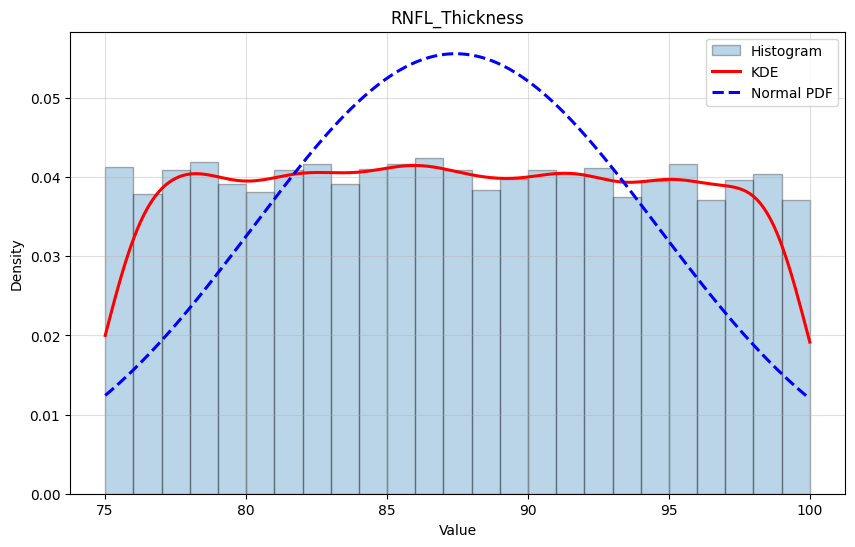

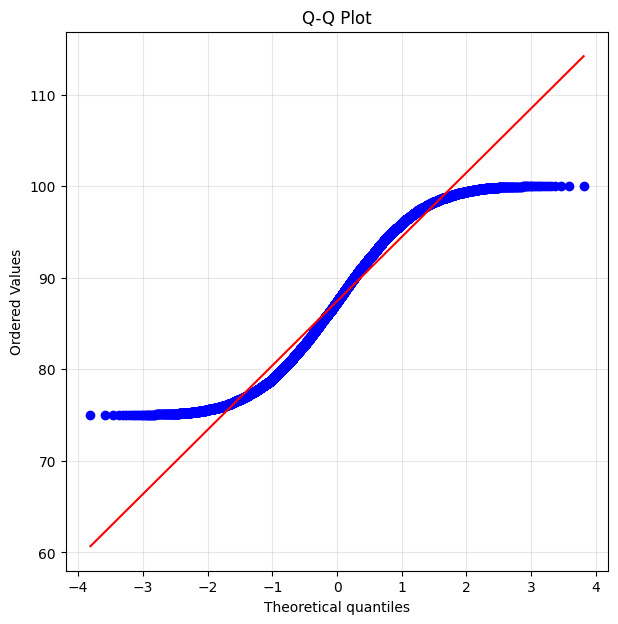

In [86]:
mean = np.mean(data_numerik["RNFL_Thickness"])
std = np.std(data_numerik["RNFL_Thickness"])

x = np.linspace(min(data_numerik["RNFL_Thickness"]), max(data_numerik["RNFL_Thickness"]), 200)

kde = gaussian_kde(data_numerik["RNFL_Thickness"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["RNFL_Thickness"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("RNFL_Thickness")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["RNFL_Thickness"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

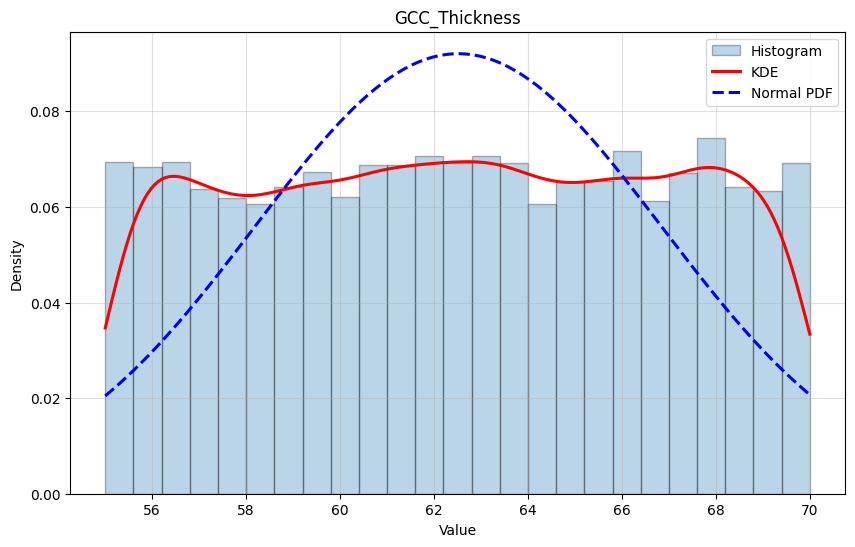

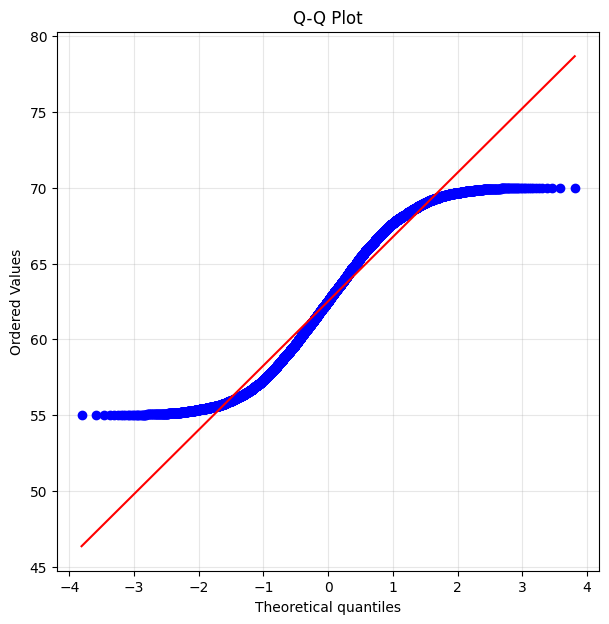

In [87]:
mean = np.mean(data_numerik["GCC_Thickness"])
std = np.std(data_numerik["GCC_Thickness"])

x = np.linspace(min(data_numerik["GCC_Thickness"]), max(data_numerik["GCC_Thickness"]), 200)

kde = gaussian_kde(data_numerik["GCC_Thickness"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["GCC_Thickness"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("GCC_Thickness")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["GCC_Thickness"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

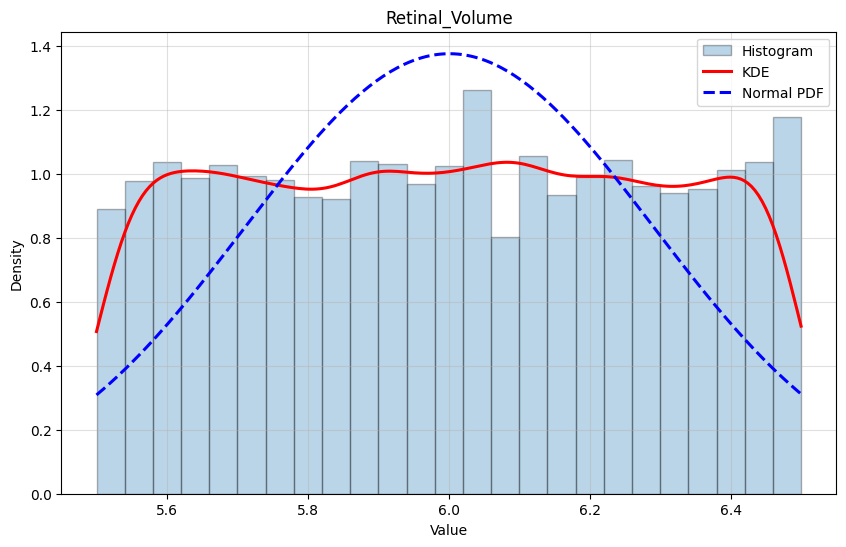

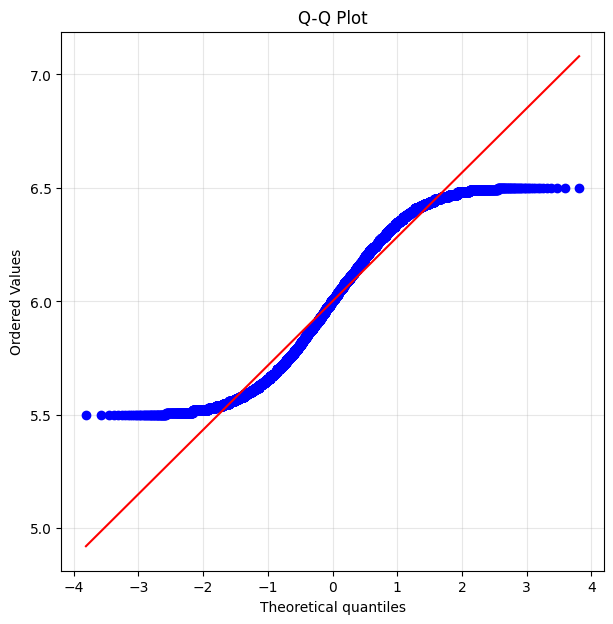

In [88]:
mean = np.mean(data_numerik["Retinal_Volume"])
std = np.std(data_numerik["Retinal_Volume"])

x = np.linspace(min(data_numerik["Retinal_Volume"]), max(data_numerik["Retinal_Volume"]), 200)

kde = gaussian_kde(data_numerik["Retinal_Volume"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Retinal_Volume"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Retinal_Volume")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Retinal_Volume"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

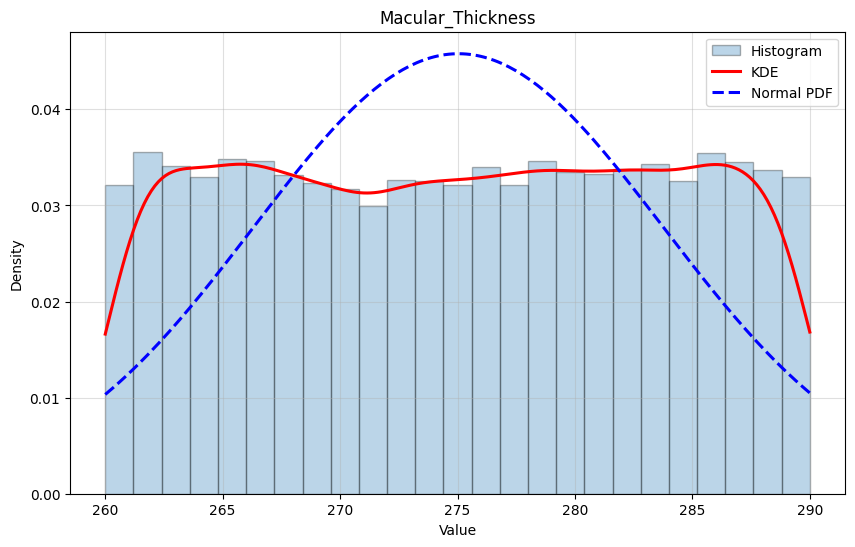

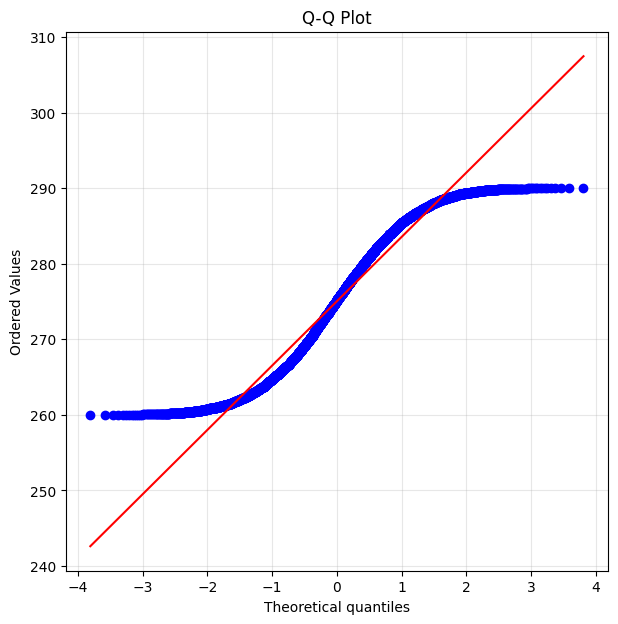

In [89]:
mean = np.mean(data_numerik["Macular_Thickness"])
std = np.std(data_numerik["Macular_Thickness"])

x = np.linspace(min(data_numerik["Macular_Thickness"]), max(data_numerik["Macular_Thickness"]), 200)

kde = gaussian_kde(data_numerik["Macular_Thickness"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Macular_Thickness"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Macular_Thickness")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Macular_Thickness"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

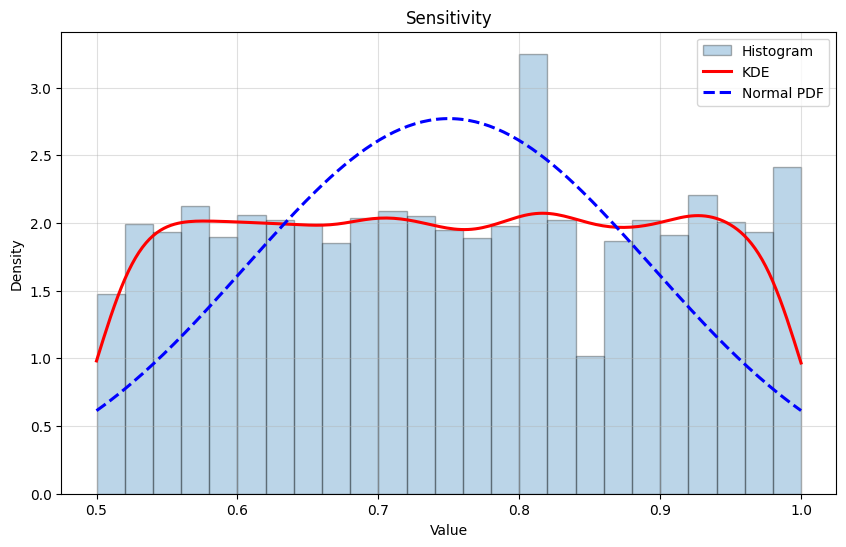

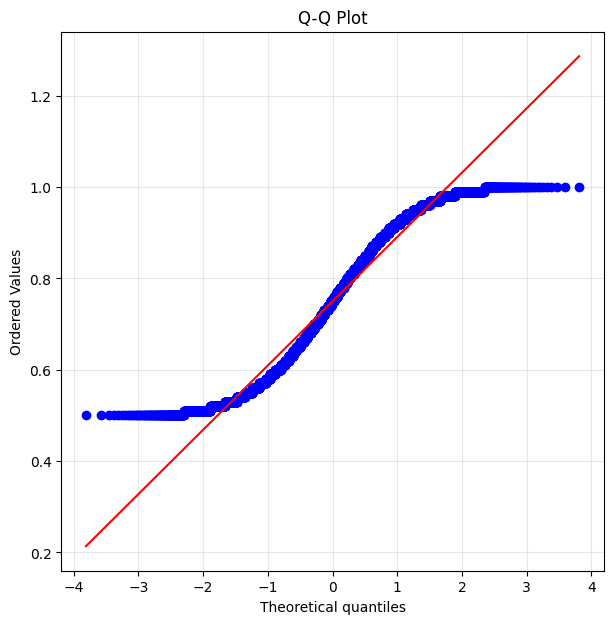

In [90]:
mean = np.mean(data_numerik["Sensitivity"])
std = np.std(data_numerik["Sensitivity"])

x = np.linspace(min(data_numerik["Sensitivity"]), max(data_numerik["Sensitivity"]), 200)

kde = gaussian_kde(data_numerik["Sensitivity"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Sensitivity"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Sensitivity")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Sensitivity"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

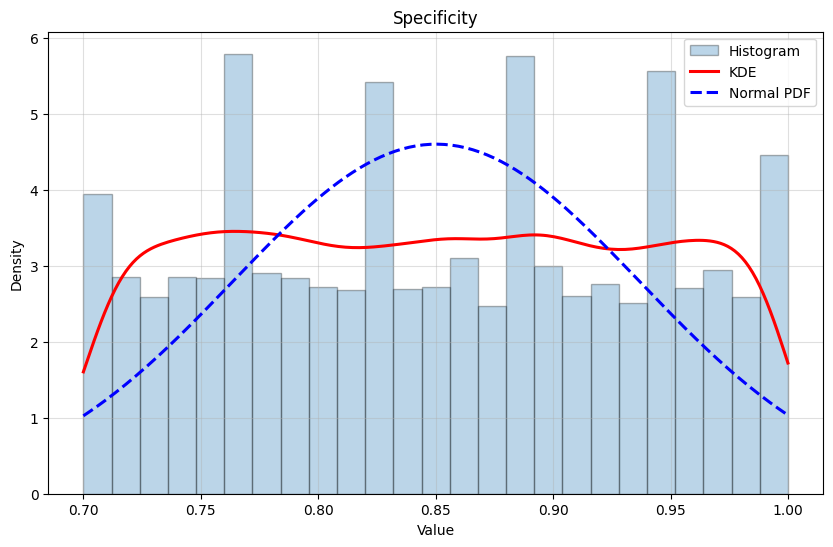

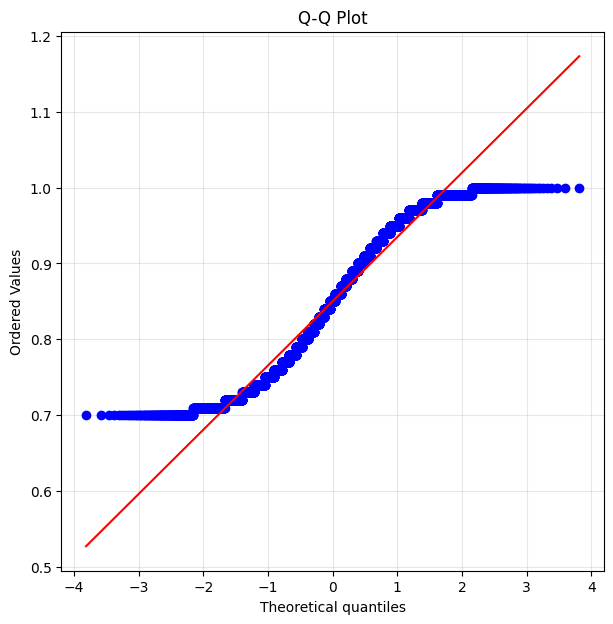

In [91]:
mean = np.mean(data_numerik["Specificity"])
std = np.std(data_numerik["Specificity"])

x = np.linspace(min(data_numerik["Specificity"]), max(data_numerik["Specificity"]), 200)

kde = gaussian_kde(data_numerik["Specificity"])
kde_values = kde(x)

normal_pdf = norm.pdf(x, mean, std)

plt.figure(figsize=(10, 6))
plt.hist(data_numerik["Specificity"], bins=25, density=True, alpha=0.3, edgecolor='black', label="Histogram")
plt.plot(x, kde_values, linewidth=2.2, label="KDE", color="red")
plt.plot(x, normal_pdf, linewidth=2.2, linestyle="--", label="Normal PDF", color="blue")

plt.title("Specificity")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))
probplot(data_numerik["Specificity"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(alpha=0.3)
plt.show()

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel

1. Pertanyaan 1
2. Pertanyaan 2
3. Pertanyaan 3
4. Pertanyaan 4


### 5.1
Pertanyaan 1

In [71]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 5.2
Pertanyaan 2

In [72]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 5.3
Pertanyaan 3

In [73]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 5.4
Pertanyaan 4

In [74]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

## Nomor 6 : Hipotesis 2 Sampel
1. Pertanyaan 1
2. Pertanyaan 2
3. Pertanyaan 3
4. Pertanyaan 4

### 6.1
Pertanyaan 1

In [75]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 6.2
Pertanyaan 2

In [76]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 6.3
Pertanyaan 3

In [77]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 6.4
Pertanyaan 4

In [78]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.